In [1]:
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt 
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
# reading csv files
df =  pd.read_csv('letter-recognition.data', header = None)
print(df)


      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0      T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1      I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2      D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3      N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4      G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19995  D   2   2   3   3   2   7   7   7   6   6   6   4   2   8   3   7
19996  C   7  10   8   8   4   4   8   6   9  12   9  13   2   9   3   7
19997  T   6   9   6   7   5   6  11   3   7  11   9   5   2  12   2   4
19998  S   2   3   4   2   1   8   7   2   6  10   6   8   1   9   5   8
19999  A   4   9   6   6   2   9   5   3   1   8   1   8   2   7   2   8

[20000 rows x 17 columns]


# (A) Data preprocessing

In [3]:
df.columns = ['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2br','xy2br','x-ege','xegvy','y-ege','yegvx']
df

letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0          T      2      8      3     5      1      8     13      0      6   
1          I      5     12      3     7      2     10      5      5      4   
2          D      4     11      6     8      6     10      6      2      6   
3          N      7     11      6     6      3      5      9      4      6   
4          G      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      D      2      2      3     3      2      7      7      7      6   
19996      C      7     10      8     8      4      4      8      6      9   
19997      T      6      9      6     7      5      6     11      3      7   
19998      S      2      3      4     2      1      8      7      2      6   
19999      A      4      9      6     6      2      9      5      3      1   

       xybar  x2br  xy2br  x-ege  xegvy  y-ege  yegvx  
0          6    10      8      0      8      0      8  
1         13     3      9      2      8      4     10  
2         10     3      7      3      7      3      9  
3          4     4     10      6     10      2      8  
4          6     5      9      1      7      5     10  
...      ...   ...    ...    ...    ...    ...    ...  
19995      6     6      4      2      8      3      7  
19996     12     9     13      2      9      3      7  
19997     11     9      5      2     12      2      4  
19998     10     6      8      1      9      5      8  
19999      8     1      8      2      7      2      8  

[20000 rows x 17 columns]

# Pair 1: H & K

In [4]:
H_data = df.loc[df.iloc[:,0] == 'H']
K_data = df.loc[df.iloc[:,0] == 'K']

In [5]:
# concat
H_K = [H_data, K_data]

HK_data = pd.concat(H_K)

In [7]:
# extract H & K x and y label

HK_X = HK_data.drop('letter', axis = 1)
HK_y= HK_data['letter']

In [8]:
# 0.9 training set, 0.1 vali set
HK_X_train, HK_X_vali, HK_y_train, HK_y_vali = train_test_split(HK_X, HK_y, train_size = 0.9, random_state= 42)


<IPython.core.display.Javascript object>

# Pair 2: M & Y

In [9]:
M_data = df.loc[df.iloc[:,0] == 'M']
Y_data = df.loc[df.iloc[:,0] == 'Y']

In [10]:
# Concat
M_Y = [M_data, Y_data]
M_Y_data = pd.concat(M_Y)
# shuffle the data
# M_Y_data = M_Y_data.sample(frac=1).reset_index(drop=True)

# extract M Y x and y label

MY_X = M_Y_data.drop('letter', axis = 1)
MY_y = M_Y_data['letter']

# 0.9 training set, 0.1 vali set
MY_X_train, MY_X_vali, MY_y_train, MY_y_vali = train_test_split(MY_X, MY_y, train_size = 0.9, random_state= 42)


<IPython.core.display.Javascript object>

# Pair 3: A & B

In [11]:
A_data = df.loc[df.iloc[:,0] == 'A']
B_data = df.loc[df.iloc[:,0] == 'B']

In [12]:
# Concat
A_B = [A_data, B_data]
A_B_data = pd.concat(A_B)
# shuffle the data
# A_B_data = A_B_data.sample(frac=1).reset_index(drop=True)

# extract A B x and y label

AB_X = A_B_data.drop('letter', axis = 1)
AB_y = A_B_data['letter']

# 0.9 training set, 0.1 vali set
AB_X_train, AB_X_vali, AB_y_train, AB_y_vali = train_test_split(AB_X, AB_y, train_size = 0.9, random_state= 42)


<IPython.core.display.Javascript object>

# Pair 4: All data 

In [13]:
# extract df x and y label

df_X = df.drop('letter', axis = 1)
df_y = df['letter']

In [14]:
df_X_train, df_X_vali, df_y_train, df_y_vali = train_test_split(df_X, df_y, train_size = 0.9, random_state= 42 )


<IPython.core.display.Javascript object>

In [15]:
df_X_train

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
16270      2      4      4     3      2      7      7      6      6      6   
1383       5      6      7     4      5      5      9      3      6     10   
3472       5      6      7     4      3      6      8      3      5     11   
19900      3      7      5     5      4     10      5      2      6      8   
2150       3      5      5     6      4      8      9      4      5      7   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
11284      5     11      4     6      3      7      7      4      3      9   
11964      3      7      5     5      4      9     11      6      4      6   
5390       3      4      6     3      2      9      6      2      8     10   
860        3      8      4     6      2      7      8      0      8     14   
15795      1      3      2     2      1     10      7      1      5     11   

       x2br  xy2br  x-ege  xegvy  y-ege  yegvx  
16270     6     10      2      9      4      9  
1383      9      9      3      9      3      6  
3472      8      8      5      8      1      8  
19900     5      5      3      7      5      7  
2150      6      8      3      8      8      9  
...     ...    ...    ...    ...    ...    ...  
11284     6      7      3     10      8      7  
11964     5      7      2      8      6      4  
5390      3      7      2      7      3      9  
860       6      6      0      8      1      7  
15795     4      8      0      7      0      7  

[18000 rows x 16 columns]

# (B) Model Fitting

In [90]:
def plot_grid_search_para3(cv_results, grid_param_1, grid_param_2, grid_param_3, name_param_1, name_param_2, name_param_3):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_3), len(grid_param_2), len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_3), len(grid_param_2), len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(15,8))

    for i, val in enumerate(grid_param_3):
        for j, val2 in enumerate(grid_param_2):
            ax.plot(grid_param_1, scores_mean[i,j,:], '-o', label= name_param_3 + ': ' + str(val) + ', ' + name_param_2 + ': ' + str(val2))

    ax.set_title("Grid Search Scores for 3 params", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc='center left', fontsize=10, bbox_to_anchor=(1, 0.5))
    ax.grid('on')

In [17]:
def plot_grid_search_para2(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2), len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(15,8))

    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores for SVM", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc='center left', fontsize=10, bbox_to_anchor=(1, 0.5))
    ax.grid('on')

# Bonus 1: Multi-class classification_1 without dimension reduction

Best k: 1
Best k accuracy:0.9542222222222222
Accuracy on testing 0.9575
testing time:  0.44828176498413086


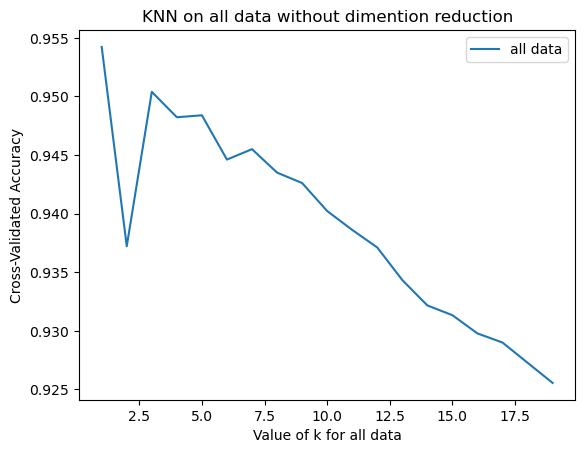

In [98]:
# Pair 4
k_range = range(1, 20)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_X_train, df_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    

# print the best k
best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy:{k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(df_X_train, df_y_train)

y_pred = knn.predict(df_X_vali)

accuracy = accuracy_score(df_y_vali, y_pred)
print('Accuracy on testing', accuracy)
# print('confusion matrix:')
# print(confusion_matrix(df_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='all data')
plt.title('KNN on all data without dimention reduction')
plt.xlabel('Value of k for all data')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# First Model. KNN_1 (without demention reduction)
KNN tuning 1. k, 2. distance metric 3. algo using 5-fold CV

# KNN_1 - Pair 1

Best k: 1
Best k accuracy:0.9524528301886793
confusion matrix
[[73  2]
 [ 3 70]]
Accuracy on testing 0.9662162162162162
testing time:  0.009001970291137695


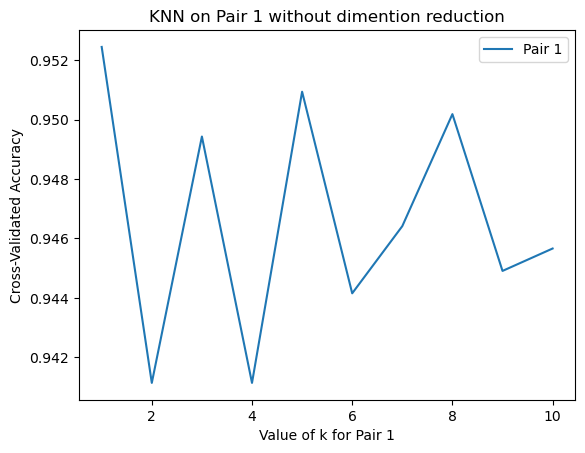

In [19]:
# Pair 1
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, HK_X_train, HK_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    


# print(k_scores.values())
# print the best k
best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy:{k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(HK_X_train, HK_y_train)

y_pred = knn.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix')
print(confusion_matrix(HK_y_vali, y_pred))

print('Accuracy on testing', accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 1')
plt.title('KNN on Pair 1 without dimention reduction')
plt.xlabel('Value of k for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_1 - Pair 1: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

In [20]:
# # Pair 1
# k_range = range(1, 11)
# metrics = ['euclidean', 'manhattan', 'chebyshev']
# algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for algo in algos:
#     algo_scores = {}
#     for metric in metrics:
#         metric_scores = []
#         for k in k_range:
#             knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm=algo)
#             scores = cross_val_score(knn, HK_X_train, HK_y_train, cv = 5, scoring='accuracy')
#             metric_scores.append(scores.mean())
#         algo_scores[metric] = metric_scores
#     k_scores[algo] = algo_scores
# #     print(k_scores)
    
# # Plot the results
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         plt.plot(k_range, scores, label=metric + ' (' + algo + ')')

# plt.title("KNN Pair 1 without demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algo and metric
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         best_score = max(scores)
#         best_k = scores.index(best_score) + 1
#         print(f"{algo}, {metric}: Best k = {best_k}, Best score = {best_score}")

Use package grid search CV to verify the results

Best parameters:  {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 1}
Best cross-validated score:  0.959245283018868
confusion matrix:
[[72  3]
 [ 3 70]]
Accuracy on testing: 0.9594594594594594
testing time:  0.011651039123535156


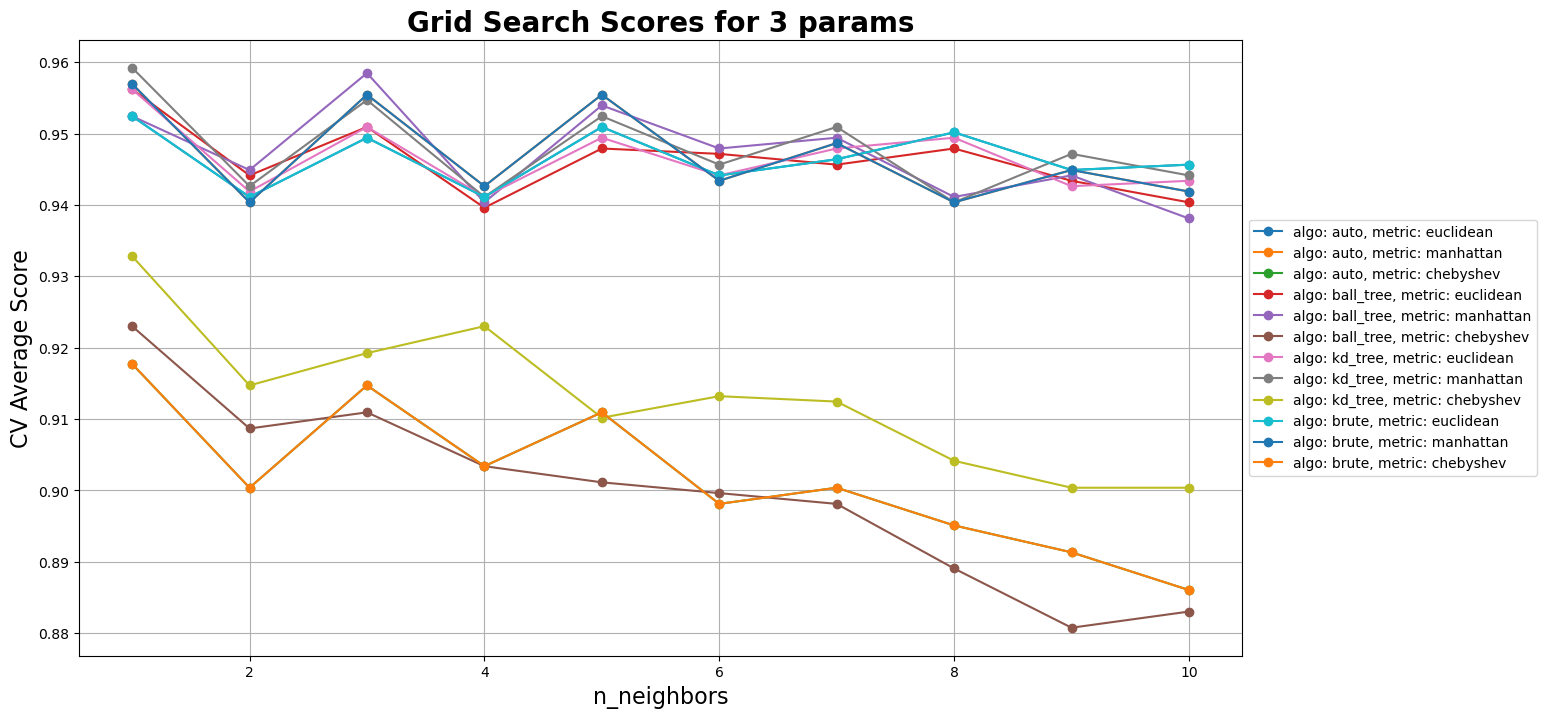

In [91]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train, HK_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
knn_HK = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])

knn_HK.fit(HK_X_train, HK_y_train)

y_pred = knn_HK.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
print("Accuracy on testing:", accuracy)

end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['metric'], param_grid['algorithm'], 'n_neighbors', 'metric','algo')


# KNN_1 - Pair 2 

Best k: 1
Best k accuracy:0.9992957746478872
Accuracy on testing 1.0
confusion matrix:
[[95  0]
 [ 0 63]]
testing time:  0.010001182556152344


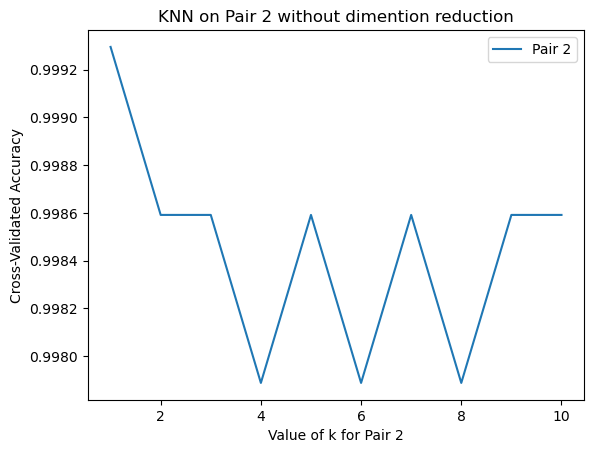

In [75]:
# Pair 2
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, MY_X_train, MY_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    
best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy:{k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(MY_X_train, MY_y_train)

y_pred = knn.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)

print('Accuracy on testing', accuracy)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
   
# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 2')
plt.title('KNN on Pair 2 without dimention reduction')
plt.xlabel('Value of k for Pair 2')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_1 - Pair 2: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validated score:  0.9992957746478872
confusion matrix
[[95  0]
 [ 0 63]]
Accuracy on testing: 1.0
testing time:  0.008564233779907227


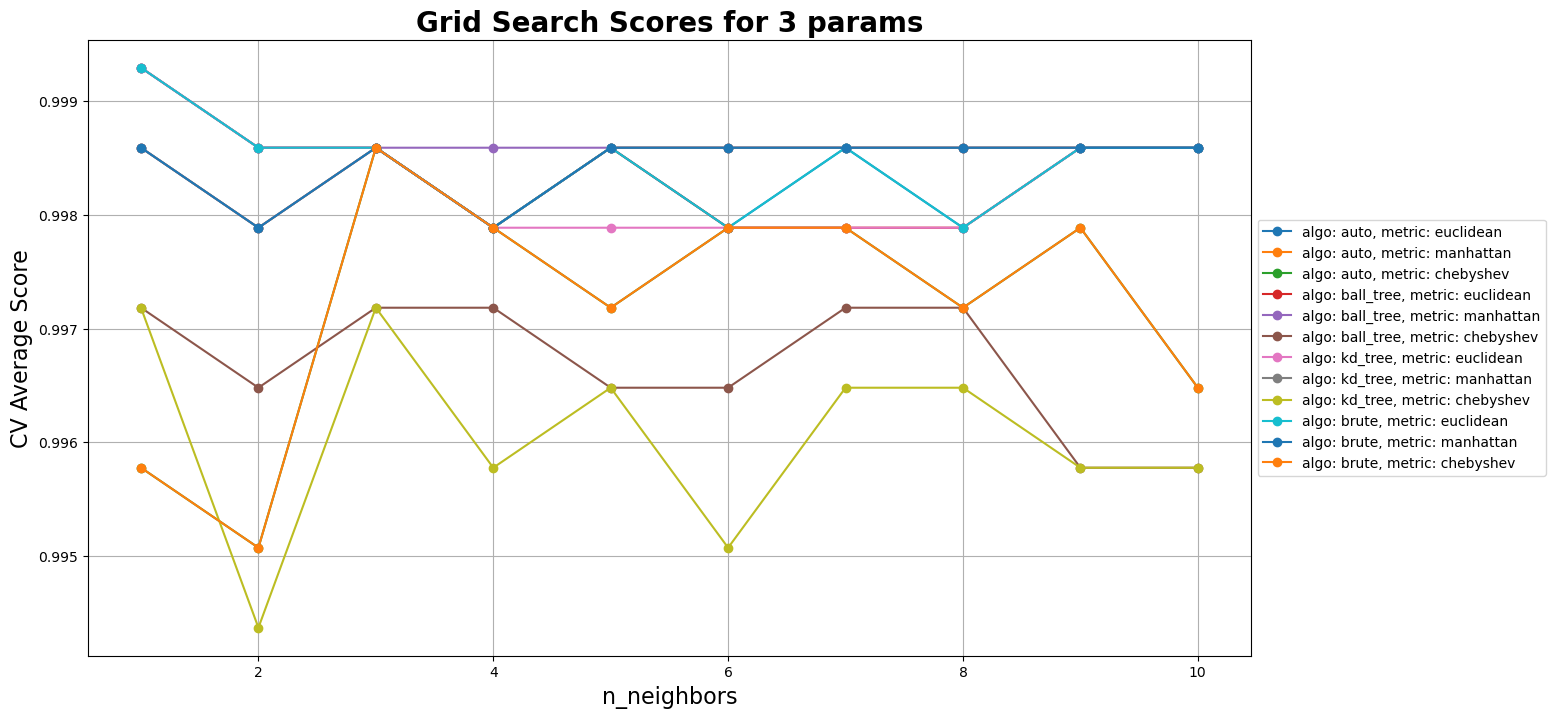

In [92]:
# Pair 2
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train, MY_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
knn_MY = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])
knn_MY.fit(MY_X_train, MY_y_train)

y_pred = knn_MY.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix')
print(confusion_matrix(MY_y_vali, y_pred))

print("Accuracy on testing:", accuracy)

end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['metric'], param_grid['algorithm'], 'n_neighbors', 'metric','algo')


# KNN_1 - Pair 3

Best k: 2
Best k accuracy:1.0
confusion matrix
[[87  0]
 [ 0 69]]
Accuracy on testing 1.0
testing time:  0.010002374649047852


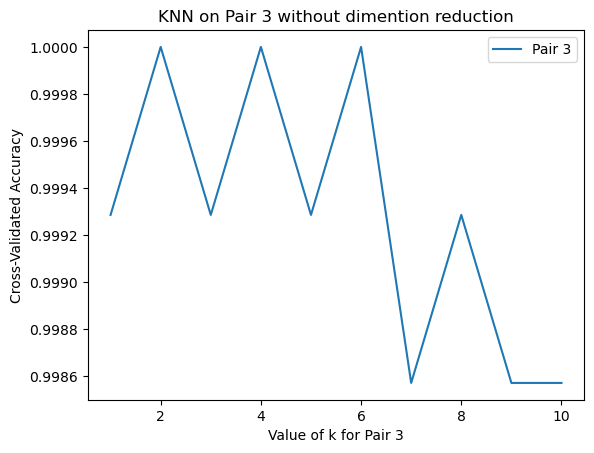

In [24]:
# Pair 3
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, AB_X_train, AB_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    


best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy:{k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(AB_X_train, AB_y_train)

y_pred = knn.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix')
print(confusion_matrix(AB_y_vali, y_pred))
print('Accuracy on testing', accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 3')
plt.title('KNN on Pair 3 without dimention reduction')
plt.xlabel('Value of k for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_1 - Pair 3: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

In [25]:
# # pair 3
# k_range = range(1, 11)
# metrics = ['euclidean', 'manhattan', 'chebyshev']
# algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for algo in algos:
#     algo_scores = {}
#     for metric in metrics:
#         metric_scores = []
#         for k in k_range:
#             knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm=algo)
#             scores = cross_val_score(knn, AB_X_train, AB_y_train, cv=5, scoring='accuracy')
#             metric_scores.append(scores.mean())
#         algo_scores[metric] = metric_scores
#     k_scores[algo] = algo_scores

# # Plot the results
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         plt.plot(k_range, scores, label=metric + ' (' + algo + ')')

# plt.title("KNN Pair 3 without demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algorithm and metric
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         best_score = max(scores)
#         best_k = scores.index(best_score) + 1
#         print(f"{algo}, {metric}: Best k = {best_k}, Best score = {best_score}")

Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 2}
Best cross-validated score:  1.0
Accuracy on testing: 1.0
confusion matrix:
[[87  0]
 [ 0 69]]
testing time:  0.009020566940307617


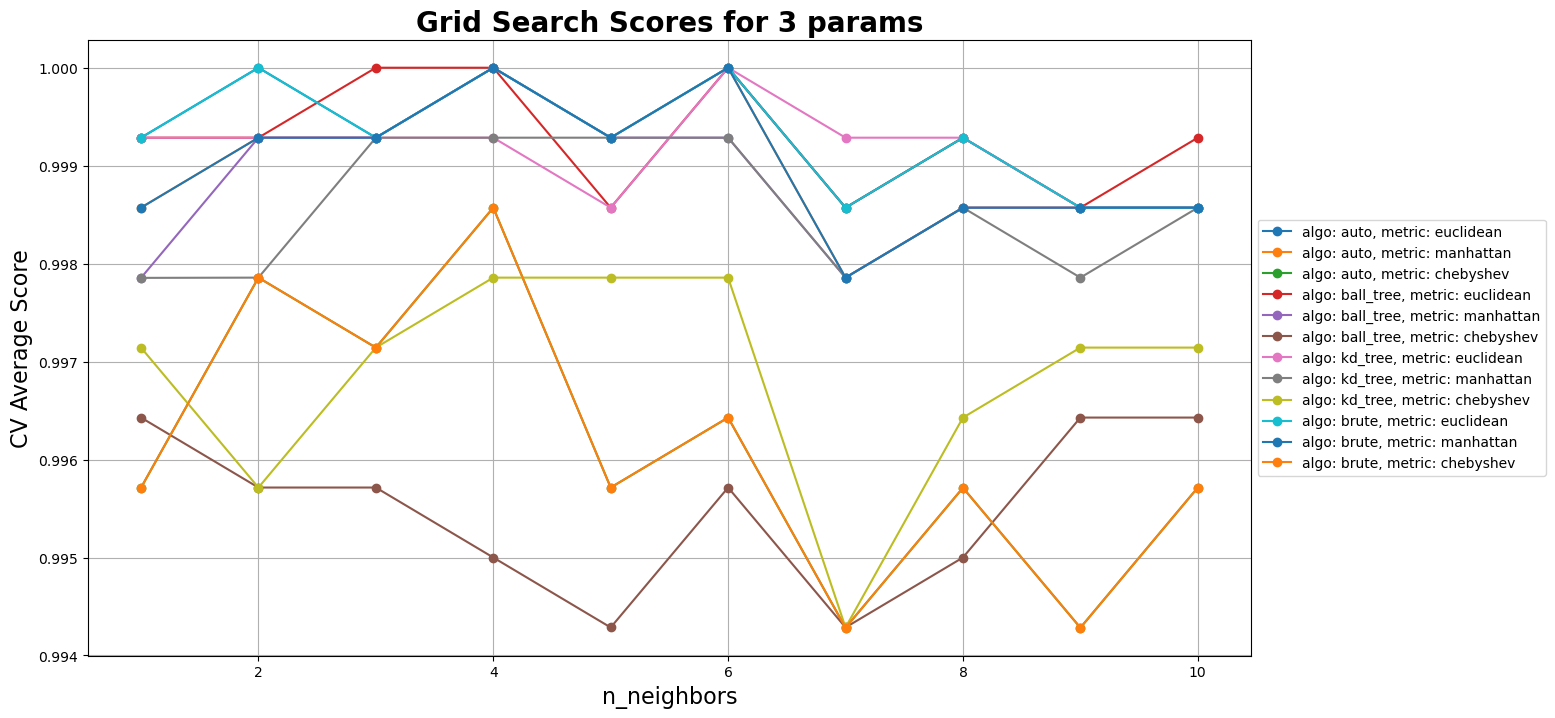

In [93]:
# Pair 3
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train, AB_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
knn_HK = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])
knn_MY.fit(AB_X_train, AB_y_train)

y_pred = knn_MY.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)

print("Accuracy on testing:", accuracy)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['metric'], param_grid['algorithm'], 'n_neighbors', 'metric','algo')


# Second Model. Random forest_1 (without feature reduction)

# Random forest_1 - Pair 1

Best split: 2
Best split accuracy:0.9743396226415095
Accuracy on testing 0.9932432432432432
confusion matrix:
[[74  1]
 [ 0 73]]
testing time:  0.14110517501831055


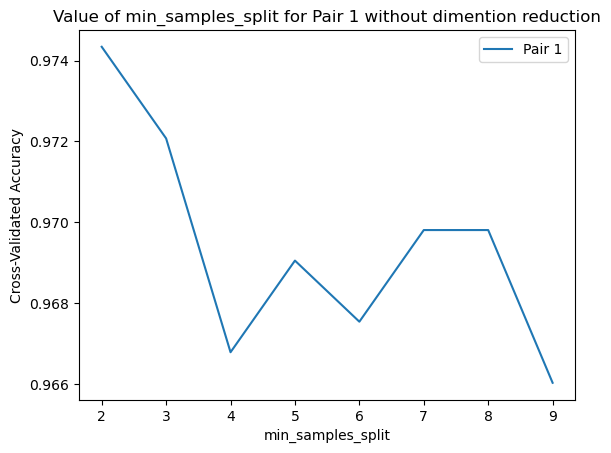

In [86]:
# Pair 1
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, HK_X_train, HK_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(HK_X_train, HK_y_train)

y_pred = rf.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('Accuracy on testing', accuracy)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
    
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 1')
plt.title('Value of min_samples_split for Pair 1 without dimention reduction')
plt.xlabel('min_samples_split')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


# Random Forest_1 - Pair 1: Bonus 2 - Tune more hyperparams
Rf: num of estimators, max_depth, min of samples split, min of samples leaf, max of features

In [28]:
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(HK_X_train, HK_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# start_time = time.time()
# rf_HK = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
#                                max_features= grid_search.best_params_['max_features'],
#                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
#                                min_samples_split= grid_search.best_params_['min_samples_split'],
#                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_HK.fit(HK_X_train, HK_y_train)

# y_pred = rf_HK.predict(HK_X_vali)

# accuracy = accuracy_score(HK_y_vali, y_pred)


# print("Accuracy:", accuracy)
# end_time = time.time()
# train_time = end_time - start_time
# print('testing time: ',train_time)

# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = HK_X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Random forest_1 - Pair 2

Best split: 2
Best split accuracy:0.9971830985915492
Accuracy on testing 0.9936708860759493
testing time:  0.12840890884399414
confusion matrix:
[[95  0]
 [ 1 62]]


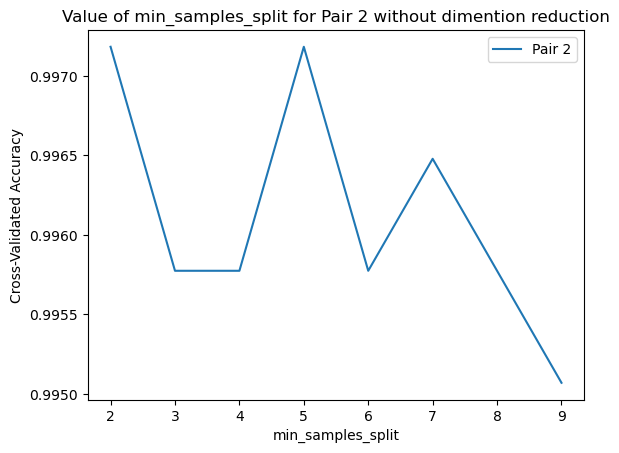

In [87]:
# Pair 2
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, MY_X_train, MY_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(MY_X_train, MY_y_train)

y_pred = rf.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('Accuracy on testing', accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ', train_time)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 2')
plt.title('Value of min_samples_split for Pair 2 without dimention reduction')
plt.xlabel('min_samples_split')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


# Random Forest_1 - Pair 2: Bonus 2 - Tune more hyperparams
Rf: num of estimators, max_depth, min of samples split, min of samples leaf, max of features

In [30]:
# # Pair 2
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(MY_X_train, MY_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# rf_MY =  RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
#                                max_features= grid_search.best_params_['max_features'],
#                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
#                                min_samples_split= grid_search.best_params_['min_samples_split'],
#                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_MY.fit(MY_X_train, MY_y_train)

# y_pred = rf_MY.predict(MY_X_vali)

# accuracy = accuracy_score(MY_y_vali, y_pred)


# print("Accuracy:", accuracy)
# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = HK_X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Random forest_1 Pair 3

Best split: 2
Best split accuracy:1.0
Accuracy on testing 1.0
confusion matrix:
[[87  0]
 [ 0 69]]
testing time:  0.12302684783935547


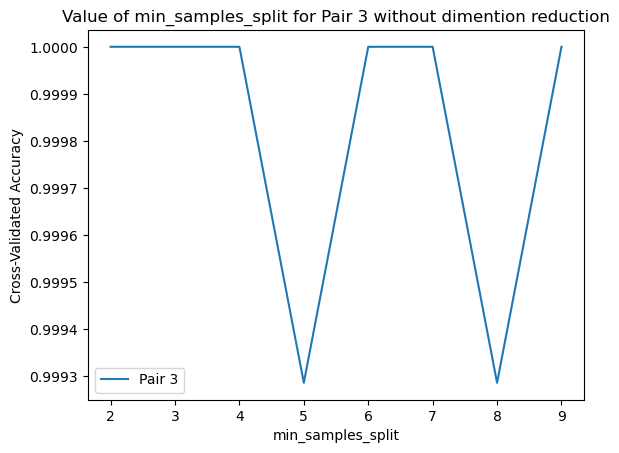

In [88]:
# Pair 3
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, AB_X_train, AB_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(AB_X_train, AB_y_train)

y_pred = rf.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('Accuracy on testing', accuracy)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ', train_time)
    
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 3')
plt.title('Value of min_samples_split for Pair 3 without dimention reduction')
plt.xlabel('min_samples_split')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


# Random Forest_1 - Pair 3: Bonus 2 - Tune more hyperparams
Rf: num of estimators, max_depth, min of samples split, min of samples leaf, max of features

In [32]:
# # Pair 3
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(AB_X_train, AB_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# rf_AB = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
#                                max_features= grid_search.best_params_['max_features'],
#                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
#                                min_samples_split= grid_search.best_params_['min_samples_split'],
#                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_AB.fit(AB_X_train, AB_y_train)

# y_pred = rf_AB.predict(AB_X_vali)

# accuracy = accuracy_score(AB_y_vali, y_pred)


# print("Accuracy:", accuracy)                              

# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = HK_X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Additional Model 1. ANN_1 (Without dimention reduction)

# ANN_1 - Pair 1

Best acti: tanh
Best acti accuracy:0.969811320754717
Accuracy on testing: 0.9797297297297297
confusion matrix:
[[73  2]
 [ 1 72]]
testing time 1.7293446063995361


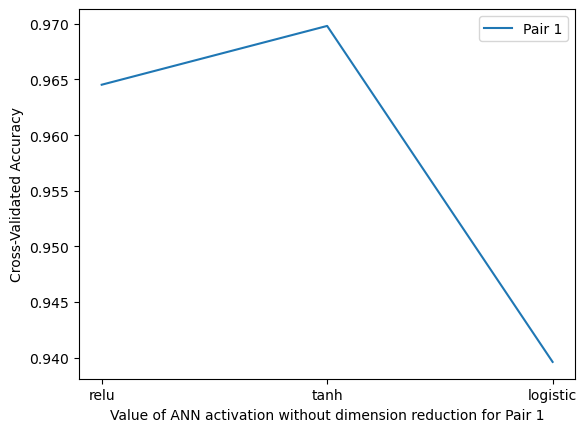

In [33]:
#  Pair 1


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, HK_X_train, HK_y_train, cv=5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_HK = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_HK.fit(HK_X_train, HK_y_train)

y_pred = mlp_HK.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)


print("Accuracy on testing:", accuracy)

print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)



# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 1')

plt.xlabel('Value of ANN activation without dimension reduction for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

In [34]:
# # Pair 1

# activation = ['relu', 'tanh', 'logistic'],
# solvers = ['lbfgs', 'sgd', 'adam'],
# max_iter = [10, 100, 300, 500, 1000, 15000]
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for t in max_iter:
#     iter_scores = {}
#     for sol in solvers:
#         sol_scores = []
#         for act in activation:
#             mlp_HK = MLPClassifier(activation= act, solver = sol, max_iter=t)
#             scores = cross_val_score(mlp_HK, HK_X_train, HK_y_train, cv = 5, scoring='accuracy')
#             sol_scores.append(scores.mean())
#         iter_scores[sol] = sol_scores
#     k_scores[t] = iter_scores
# #     print(k_scores)
    
# # Plot the results
# for t, iter_scores in k_scores.items():
#     for sol, scores in iter_scores.items():
#         plt.plot(activation, scores, label=sol + ' (' + t + ')')

# plt.title("ANN Pair 1 without demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algo and metric
# for t, iter_scores in k_scores.items():
#     for sol, scores in iter_scores.items():
#         best_score = max(scores)
#         best_k = scores.index(best_score) + 1
#         print(f"{t}, {sol}: Best k = {best_k}, Best score = {best_score}")

# ANN_1 - Pair 1: Bonus 2 - Tune more hyperparams
ANN: activation funct, solver, max iterations

Best parameters:  {'activation': 'tanh', 'max_iter': 1000, 'solver': 'adam'}
Best cross-validated score:  0.9773584905660379
confusion matrix:
[[74  1]
 [ 0 73]]
Accuracy on testing: 0.9932432432432432
testing time 0.0030007362365722656


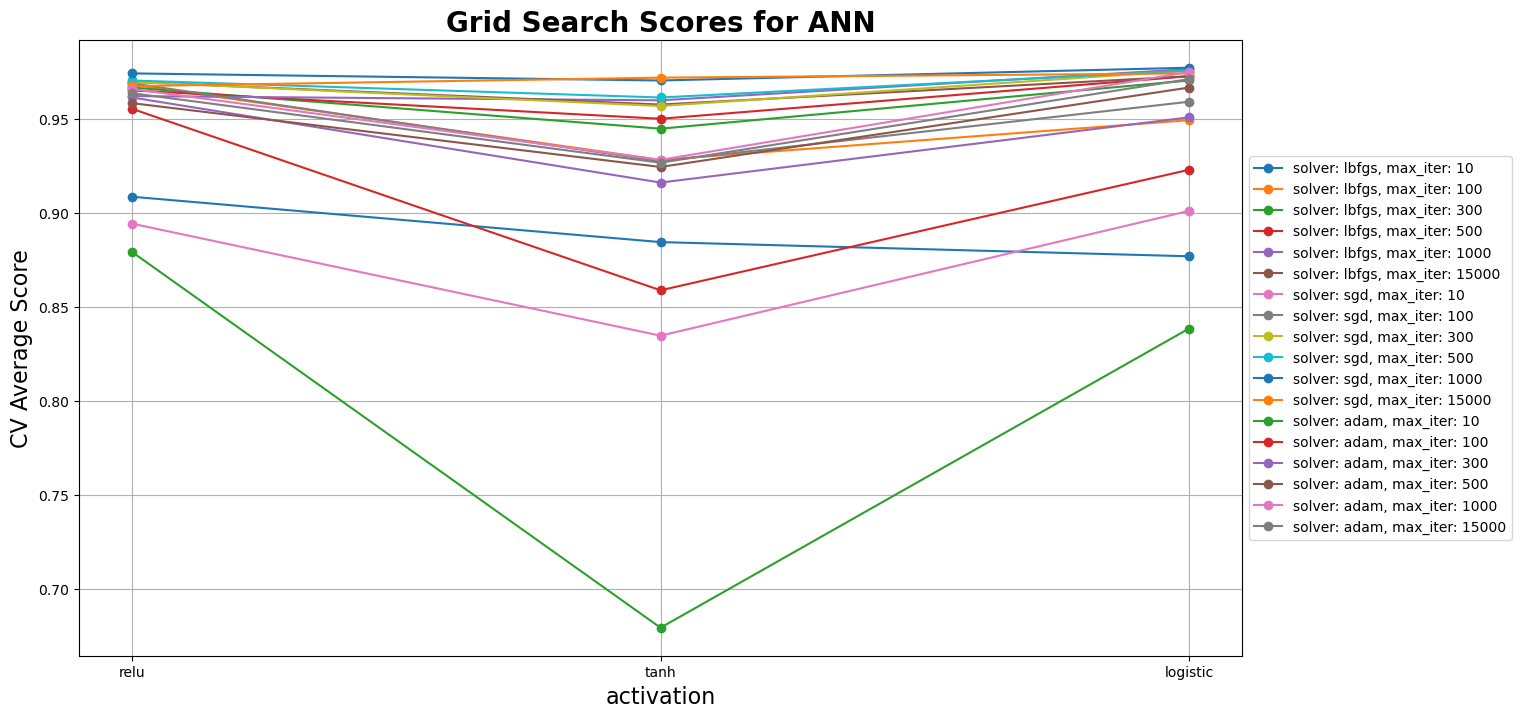

In [35]:
#  Pair 1

# Define hyperparameter grid to search over
#   'learning_rate_init': [0.001, 0.01, 0.1], 'alpha': [0.0001, 0.001, 0.01],set to default cuz it is taking forever to converge
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 15000]
     }


# Create an MLP classifier object
mlp_HK = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_HK, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train, HK_y_train)



# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)


start_time = time.time()
# mlp_HK = MLPClassifier(activation = grid_search.best_params_['activation'], 
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])
# mlp_HK.fit(HK_X_train, HK_y_train)

y_pred = grid_search.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)
results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')


# ANN_1 - Pair 2

Best acti: relu
Best acti accuracy:0.997887323943662
Accuracy on testing: 0.9936708860759493
confusion matrix:
[[95  0]
 [ 1 62]]
testing time 1.0560534000396729


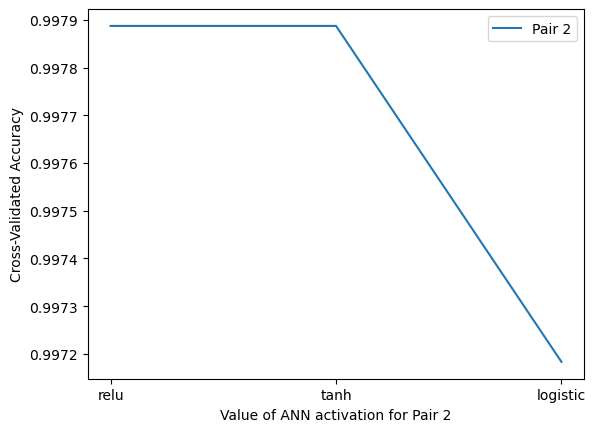

In [76]:
#  Pair 2


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, MY_X_train, MY_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_MY = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_MY.fit(MY_X_train, MY_y_train)

y_pred = mlp_MY.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)


print("Accuracy on testing:", accuracy)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))

end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)


# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 2')

plt.xlabel('Value of ANN activation for Pair 2')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

# ANN_1 - Pair 2: Bonus 2 - Tune more hyperparams
ANN:activation funct, solver, max iterations

Best parameters:  {'activation': 'relu', 'max_iter': 300, 'solver': 'lbfgs'}
Best cross-validated score:  0.9985915492957746
Accuracy on testing: 1.0
confusion matrix:
[[95  0]
 [ 0 63]]
testing time 0.0019981861114501953


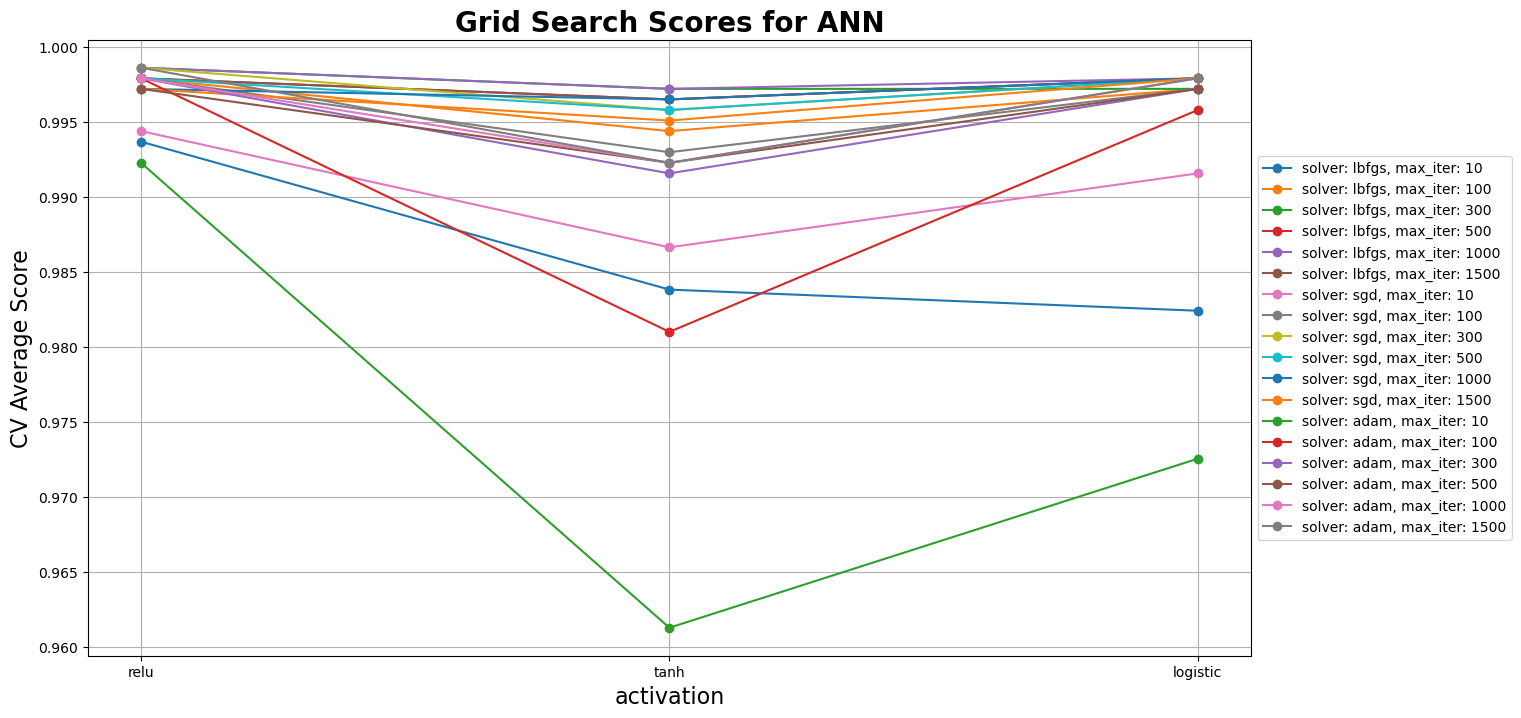

In [77]:
#  Pair 2

# Define hyperparameter grid to search over
param_grid = {
#     'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (256,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 1500]
}

# Create an MLP classifier object
mlp_MY = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_MY, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train, MY_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# mlp_MY = MLPClassifier(activation = grid_search.best_params_['activation'], 
# #                        hidden_layer_sizes= grid_search.best_params_['hidden_layer_sizes'],
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])

# mlp_MY.fit(MY_X_train, MY_y_train)

y_pred = grid_search.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)


print("Accuracy on testing:", accuracy)

print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')

# ANN_1 - Pair 3

Best acti: relu
Best acti accuracy:0.9985688684075781
Accuracy on testing: 0.9935897435897436
confusion matrix:
[[87  0]
 [ 1 68]]
testing time 1.5750536918640137


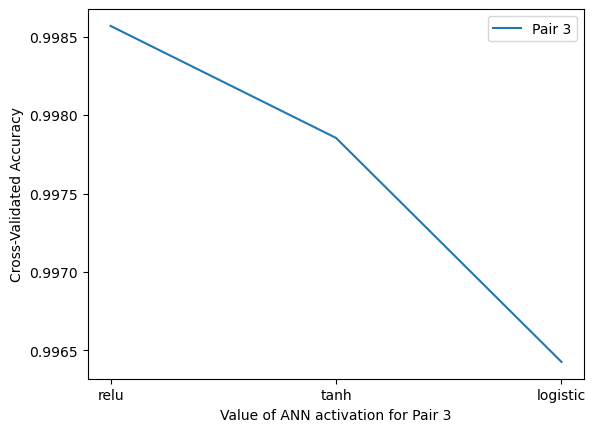

In [78]:
#  Pair 3


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, AB_X_train, AB_y_train, cv= 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_AB = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_AB.fit(AB_X_train, AB_y_train)

y_pred = mlp_AB.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)


print("Accuracy on testing:", accuracy)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))

end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)



# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 3')

plt.xlabel('Value of ANN activation for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

# ANN_1 - Pair 3: Bonus 2 - Tune more hyperparams
ANN: activation funct, solver, max iterations

Best parameters:  {'activation': 'tanh', 'max_iter': 100, 'solver': 'adam'}
Best cross-validated score:  0.9985688684075781
Accuracy: 1.0
confusion matrix:
[[87  0]
 [ 0 69]]
testing time 0.0020012855529785156


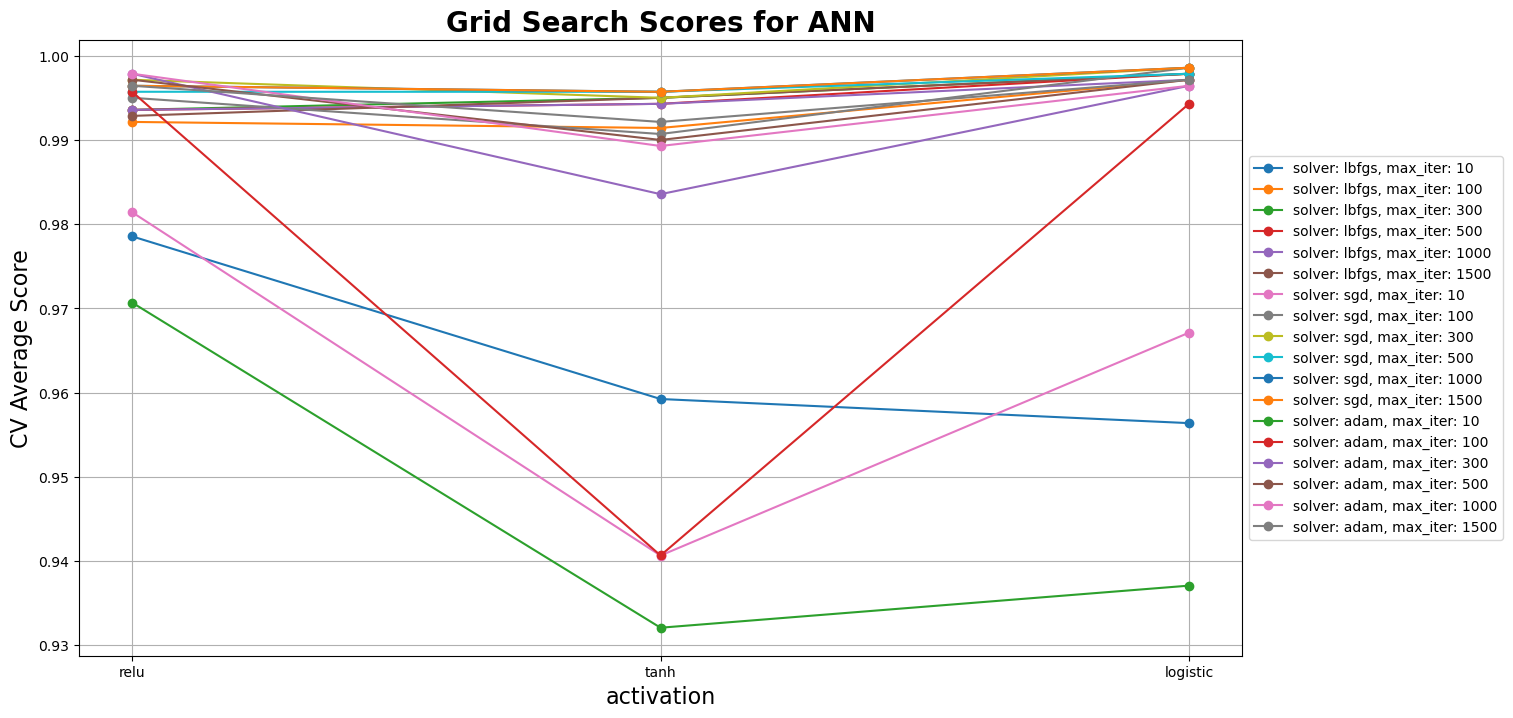

In [79]:
#  Pair 3

# Define hyperparameter grid to search over
#   'learning_rate_init': [0.001, 0.01, 0.1] set to default cuz it is taking forever to converge
param_grid = {
#     'hidden_layer_sizes': [(16,), (32,), (64,), (128,)],
    'activation': ['relu', 'tanh', 'logistic'],
     'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 1500]
}


# Create an MLP classifier object
mlp_AB = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_AB, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train, AB_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# mlp_AB = MLPClassifier(activation = grid_search.best_params_['activation'], 
# #                        hidden_layer_sizes= grid_search.best_params_['hidden_layer_sizes'],
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])
# mlp_AB.fit(AB_X_train, AB_y_train)

y_pred = grid_search.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)


print("Accuracy:", accuracy)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))

end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')

# Additional Model 2. SVM_1 (without dimention reduction)

# SVM_1 - Pair 1

Best kernel: poly
Best kernel accuracy:0.9728301886792453
Accuracy on testing: 0.9797297297297297
confusion matrix:
[[73  2]
 [ 1 72]]
testing time 0.028017520904541016


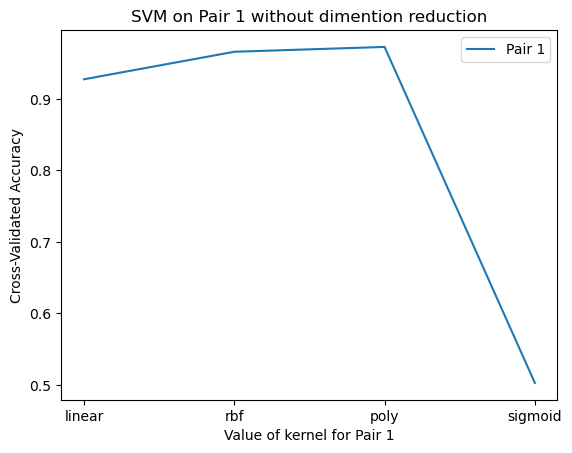

In [40]:
# Plot Pair 1
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, HK_X_train, HK_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_HK = SVC(kernel = best_kernel)
svm_HK.fit(HK_X_train, HK_y_train)

y_pred = svm_HK.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)


print("Accuracy on testing:", accuracy)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 1')
plt.title('SVM on Pair 1 without dimention reduction')
plt.xlabel('Value of kernel for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()




# SVM_1 - Pair 1: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 100, 'kernel': 'rbf'}
Best cross-validated score:  0.9803773584905662
Accuracy on testing: 0.9932432432432432
confusion matrix:
[[74  1]
 [ 0 73]]
testing time 0.0040013790130615234


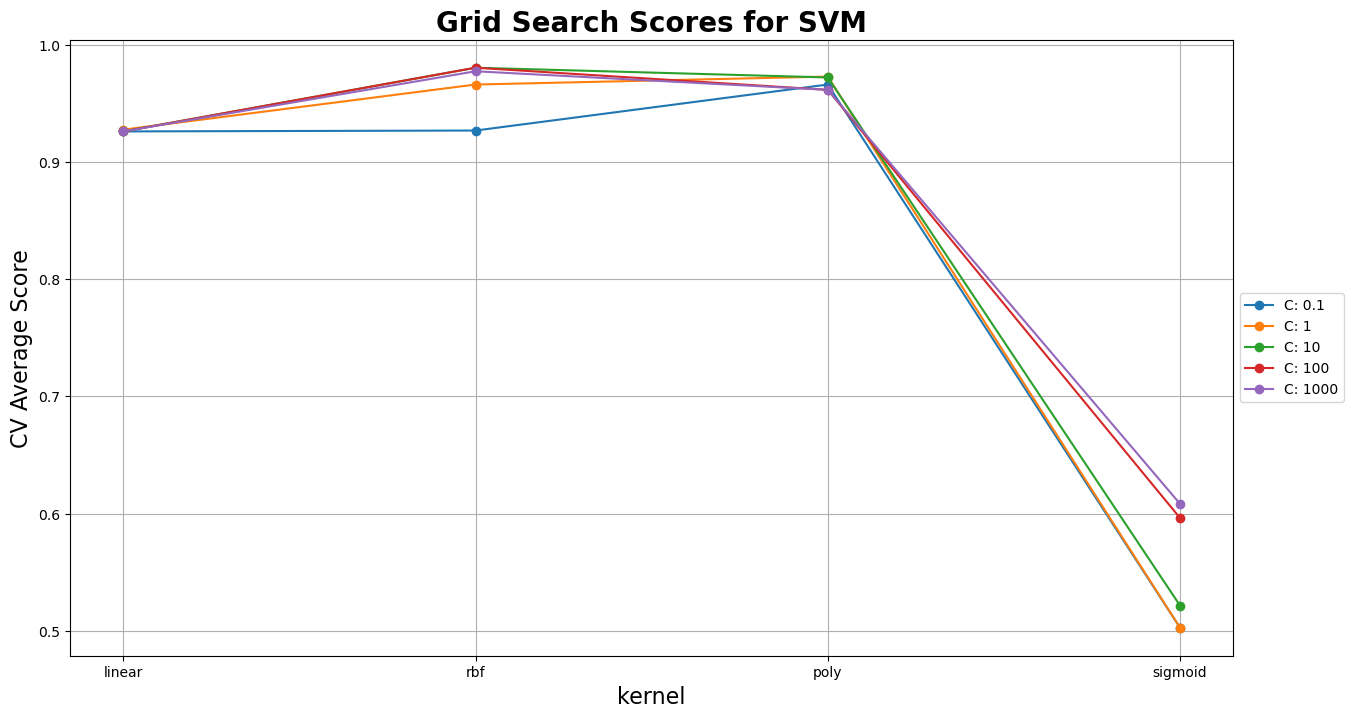

In [41]:
# Pair 1

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train, HK_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_HK = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_HK.fit(HK_X_train, HK_y_train)

y_pred = grid_search.predict(HK_X_vali)

accuracy = accuracy_score(HK_y_vali, y_pred)


print("Accuracy on testing:", accuracy)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time)
results = grid_search.cv_results_
plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )

# SVM_1 - Pair 2

Best kernel: poly
Best kernel accuracy:0.9985915492957746
Accuracy on testing: 1.0
confusion matrix:
[[95  0]
 [ 0 63]]
testing time 0.00899648666381836


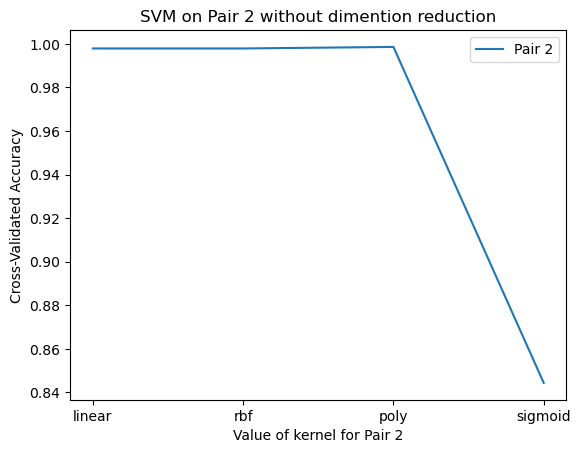

In [80]:
# Plot Pair 1
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, MY_X_train, MY_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_MY = SVC(kernel = best_kernel)
svm_MY.fit(MY_X_train, MY_y_train)

y_pred = svm_MY.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)


print("Accuracy on testing:", accuracy)

print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 2')
plt.title('SVM on Pair 2 without dimention reduction')
plt.xlabel('Value of kernel for Pair 2')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()



# SVM_1 - Pair 2: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 1, 'kernel': 'poly'}
Best cross-validated score:  0.9985915492957746
confusion matrix:
[[95  0]
 [ 0 63]]
Accuracy on testing: 1.0
testing time 0.002020120620727539


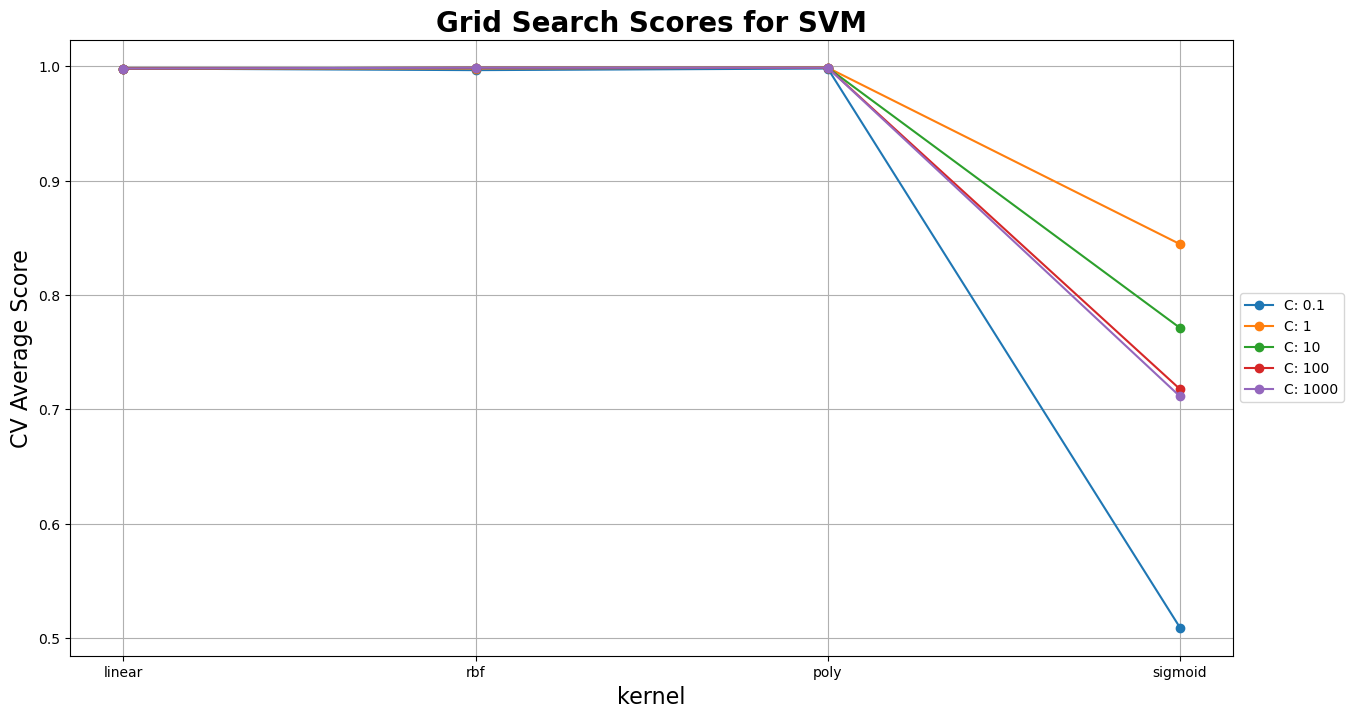

In [81]:
# Pair 2

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train, MY_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_MY = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_MY.fit(MY_X_train, MY_y_train)

y_pred = grid_search.predict(MY_X_vali)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))

end_time = time.time()
train_time = end_time - start_time

print("Accuracy on testing:", accuracy)
print('testing time', train_time)

results = grid_search.cv_results_

plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )

# SVM_1 - Pair 3

Best kernel: rbf
Best kernel accuracy:0.9992857142857143
confusion matrix:
[[87  0]
 [ 1 68]]
Accuracy on testing: 0.9935897435897436
testing time 0.013003110885620117


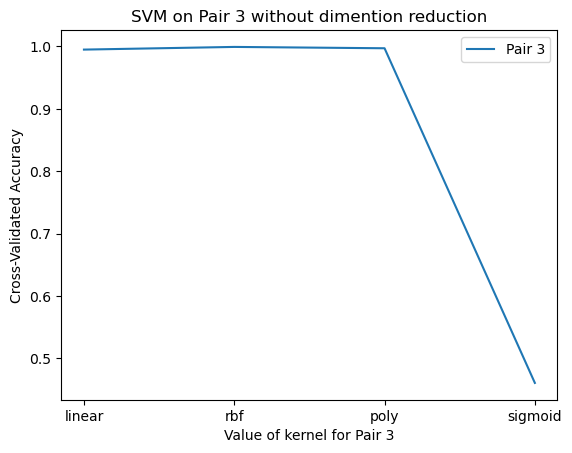

In [82]:
# Plot Pair 3
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, AB_X_train, AB_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_AB = SVC(kernel = best_kernel)
svm_AB.fit(AB_X_train, AB_y_train)

y_pred = svm_AB.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))

print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 3')
plt.title('SVM on Pair 3 without dimention reduction')
plt.xlabel('Value of kernel for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()



# SVM_1 - Pair 3: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 1, 'kernel': 'rbf'}
Best cross-validated score:  0.9992857142857143
confusion matrix:
[[87  0]
 [ 1 68]]
Accuracy on testing: 0.9935897435897436
testing time 0.003000497817993164


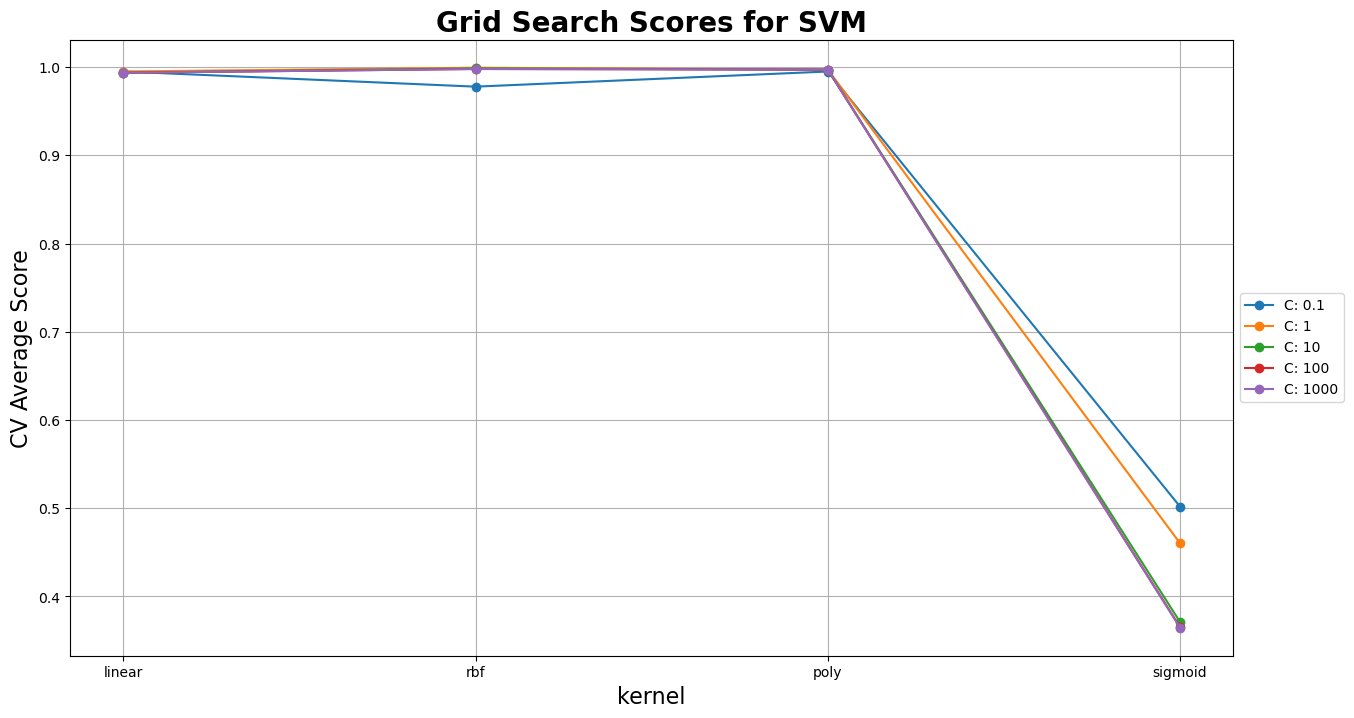

In [83]:
# Pair 3

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train, AB_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_AB = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_AB.fit(AB_X_train, AB_y_train)

y_pred = grid_search.predict(AB_X_vali)

accuracy = accuracy_score(AB_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time)

results = grid_search.cv_results_
plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )

# (C) Dimension Reduction 16 to 4

In [46]:
#  Pair 1

# instantiate PCA with 4 components
pca = PCA(n_components= 4)

# fit and transform the data
HK_X_train_pca = pca.fit_transform(HK_X_train)
HK_X_vali_pca = pca.fit_transform(HK_X_vali)

# HK_X_train_pca = pd.DataFrame(HK_X_train_pca)
# HK_X_train_pca.columns = ['PC1','PC2','PC3','PC4']


# fit and transform the data
MY_X_train_pca = pca.fit_transform(MY_X_train)
MY_X_vali_pca = pca.fit_transform(MY_X_vali)


# MY_X_train_pca = pd.DataFrame(MY_X_train_pca)
# MY_X_train_pca.columns = ['PC1','PC2','PC3','PC4']

# fit and transform the data
AB_X_train_pca = pca.fit_transform(AB_X_train)
AB_X_vali_pca = pca.fit_transform(AB_X_vali)


# AB_X_train_pca = pd.DataFrame(AB_X_train_pca)
# AB_X_train_pca.columns = ['PC1','PC2','PC3','PC4']



# fit and transform the data
df_X_train_pca = pca.fit_transform(df_X_train)
df_X_vali_pca = pca.fit_transform(df_X_vali)

print('Pair 1 PCA',HK_X_train_pca)
print('Pair 2 PCA',MY_X_train_pca)
print('Pair 3 PCA',AB_X_train_pca)
print('Pair 4 PCA', df_X_train_pca)

Pair 1 PCA [[ 2.05299506 -1.19262037 -1.05693168 -1.76139732]
 [ 3.18621251 -1.7937807  -1.61977961 -2.88251939]
 [-3.25908022  2.11924323 -2.55949176  3.33625849]
 ...
 [-0.9055564  -1.42056891  6.39138442  0.44935429]
 [-6.22702395  2.00885857  4.51825114 -0.26956484]
 [-2.58750787 -1.48473128 -3.90422117 -1.99751045]]
Pair 2 PCA [[ 3.10410447  0.9610054  -4.02836655 -2.34025267]
 [12.68101473 -3.81054862 -2.73157355  1.73518035]
 [-5.88259978 -6.08558376  0.11204581 -3.78773158]
 ...
 [ 0.36878388 -1.36232511 -1.0247218   7.61356026]
 [-4.58921062 -2.81410235  5.33942504 -0.65255777]
 [-3.85364444 -6.59541094  3.76012115 -4.10190975]]
Pair 3 PCA [[-2.40058567  6.00657313 -2.17816446 -0.0819585 ]
 [ 4.07969331 -5.05211196 -0.57546197  1.27775348]
 [ 7.71942985 -1.58006563  1.39875874  3.56985826]
 ...
 [ 5.04172883 -6.1575451  -0.43144485  3.78767557]
 [ 3.28758956  2.72436763 -3.72364041 -3.2466025 ]
 [ 7.61528492  0.93624168  0.6964121  -1.62506883]]
Pair 4 PCA [[-4.66136764 -2.193

# Bonus 1: Multi-class classification_2 with dimension reduction

Best k: 8
Best k accuracy:0.601611111111111
Accuracy on testing 0.5595
testing time:  0.07370352745056152


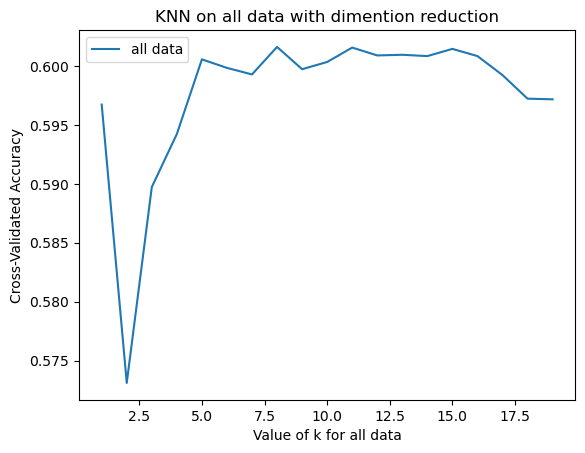

In [97]:
# Pair 4
k_range = range(1, 20)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_X_train_pca, df_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    

# print the best k
best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy:{k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(df_X_train_pca, df_y_train)

y_pred = knn.predict(df_X_vali_pca)

accuracy = accuracy_score(df_y_vali, y_pred)
print('Accuracy on testing', accuracy)
# print('confusion matrix:')
# print(confusion_matrix(df_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='all data')
plt.title('KNN on all data with dimention reduction')
plt.xlabel('Value of k for all data')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# First Model. KNN_2 (with dimension reduction)

# KNN_2 - Pair 1

Best k: 8
Best k accuracy: 0.9003773584905661
Accuracy on testing:  0.5337837837837838
confusion matrix:
[[45 30]
 [39 34]]
testing time:  0.005995273590087891


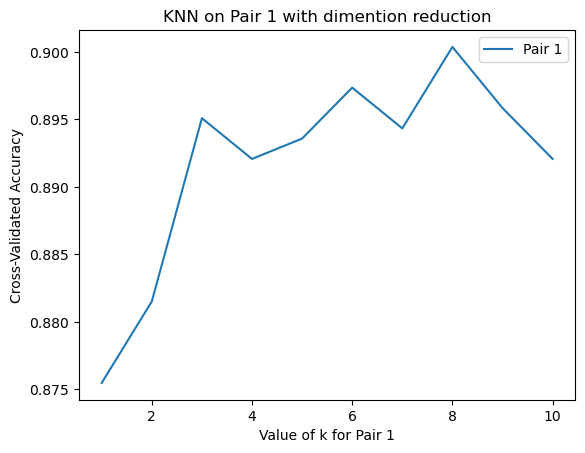

In [48]:
# Pair 1
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, HK_X_train_pca, HK_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    


best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy: {k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(HK_X_train_pca, HK_y_train)

y_pred = knn.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('Accuracy on testing: ', accuracy)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 1')
plt.title('KNN on Pair 1 with dimention reduction')
plt.xlabel('Value of k for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_2 - Pair 1: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 8}
Best cross-validated score:  0.9003773584905661
confusion matrix:
[[45 30]
 [39 34]]
Accuracy on testing: 0.5337837837837838
testing time:  0.0050182342529296875


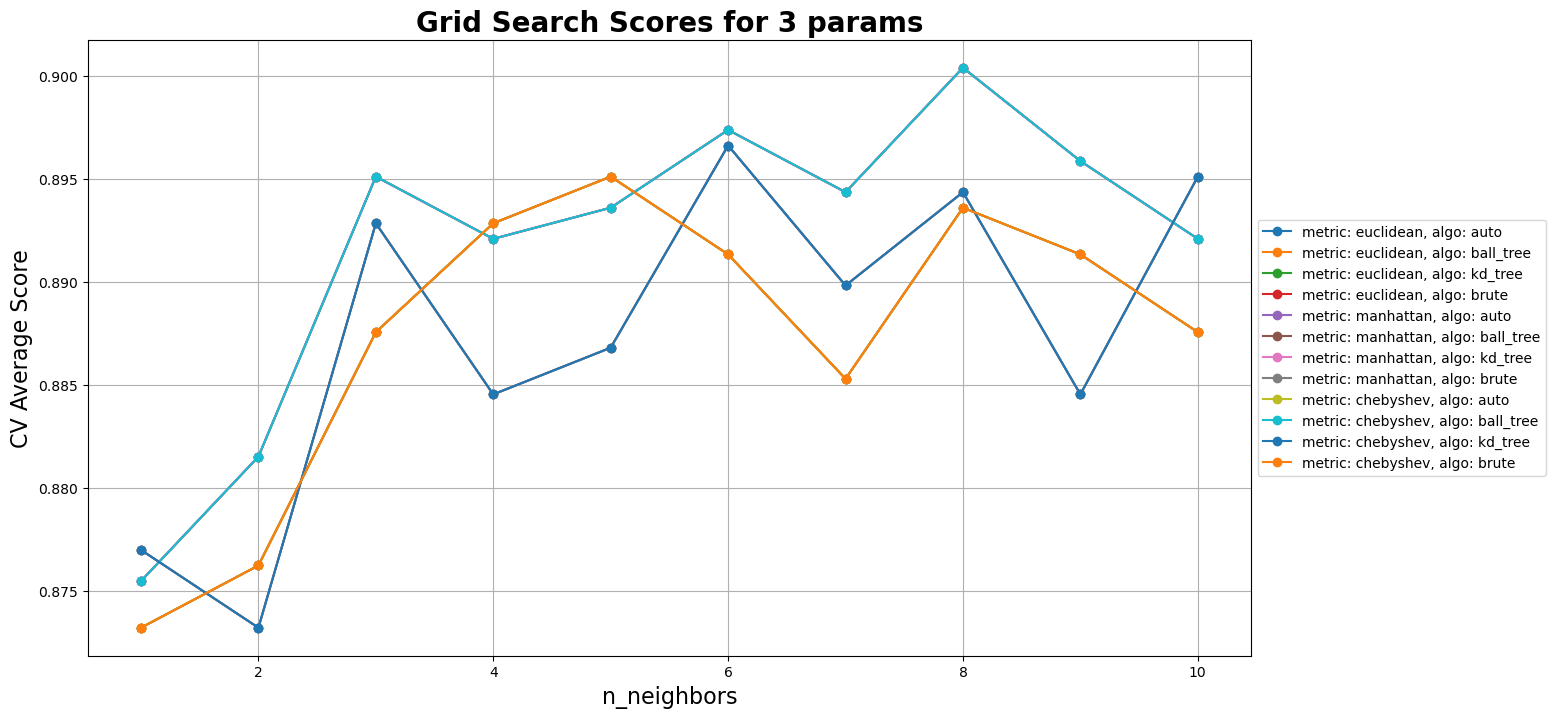

In [94]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train_pca, HK_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# knn_HK = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])


# knn_HK.fit(HK_X_train_pca, HK_y_train)
y_pred = grid_search.predict(HK_X_vali_pca)
# y_pred = knn_HK.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['algorithm'], param_grid['metric'], 'n_neighbors', 'algo', 'metric')

In [50]:
# # Pair 1
# k_range = range(1, 11)
# metrics = ['euclidean', 'manhattan', 'chebyshev']
# algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for algo in algos:
#     algo_scores = {}
#     for metric in metrics:
#         metric_scores = []
#         for k in k_range:
#             knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm=algo)
#             scores = cross_val_score(knn, HK_X_train_pca, HK_y_train, cv = 5, scoring='accuracy')
#             metric_scores.append(scores.mean())
#         algo_scores[metric] = metric_scores
#     k_scores[algo] = algo_scores

# for i in k_scores:
#     print("kkkk", i)
    
# # Plot the results
# plt.figure(figsize=(10,6))
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         plt.plot(k_range, scores, label= metric + ' (' + algo + ')',alpha= 0.7)

# plt.title("KNN Pair 1 with demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algo and metric
# # for algo, algo_scores in k_scores.items():
# #     for metric, scores in algo_scores.items():
# #         best_score = max(scores)
# #         best_k = scores.index(best_score) + 1
# #         print(f"{algo}, {metric}: Best k = {best_k}, Best score = {best_score}")
# # for algo, algo_scores in k_scores.items():
# #     for metric, scores in algo_scores.items():
# #         print(f"{algo}, {metric}: {scores}")
# #         print('------------------------')

# KNN_2 Pair 2

Best k: 4
Best k accuracy: 0.9816901408450704
Accuracy on testing:  0.4430379746835443
confusion matrix:
[[44 51]
 [37 26]]
testing time:  0.007984399795532227


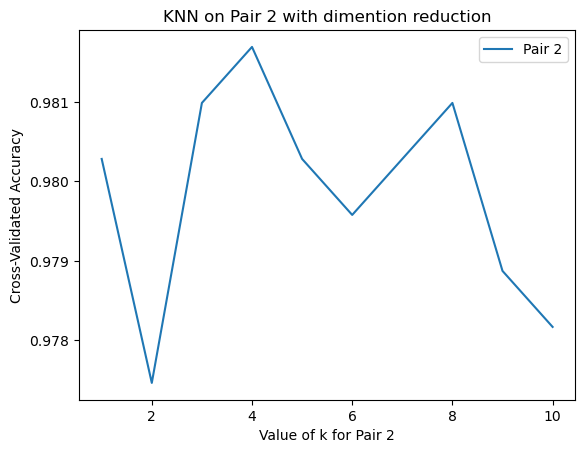

In [51]:
# Pair 2
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, MY_X_train_pca, MY_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    


best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy: {k_scores[best_k]}')

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(MY_X_train_pca, MY_y_train)

y_pred = knn.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('Accuracy on testing: ', accuracy)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 2')
plt.title('KNN on Pair 2 with dimention reduction')
plt.xlabel('Value of k for Pair 2')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_2 - Pair 2: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

Best parameters:  {'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 1}
Best cross-validated score:  0.9838028169014086
confusion matrix:
[[42 53]
 [36 27]]
Accuracy on testing: 0.43670886075949367
testing time:  0.00403285026550293


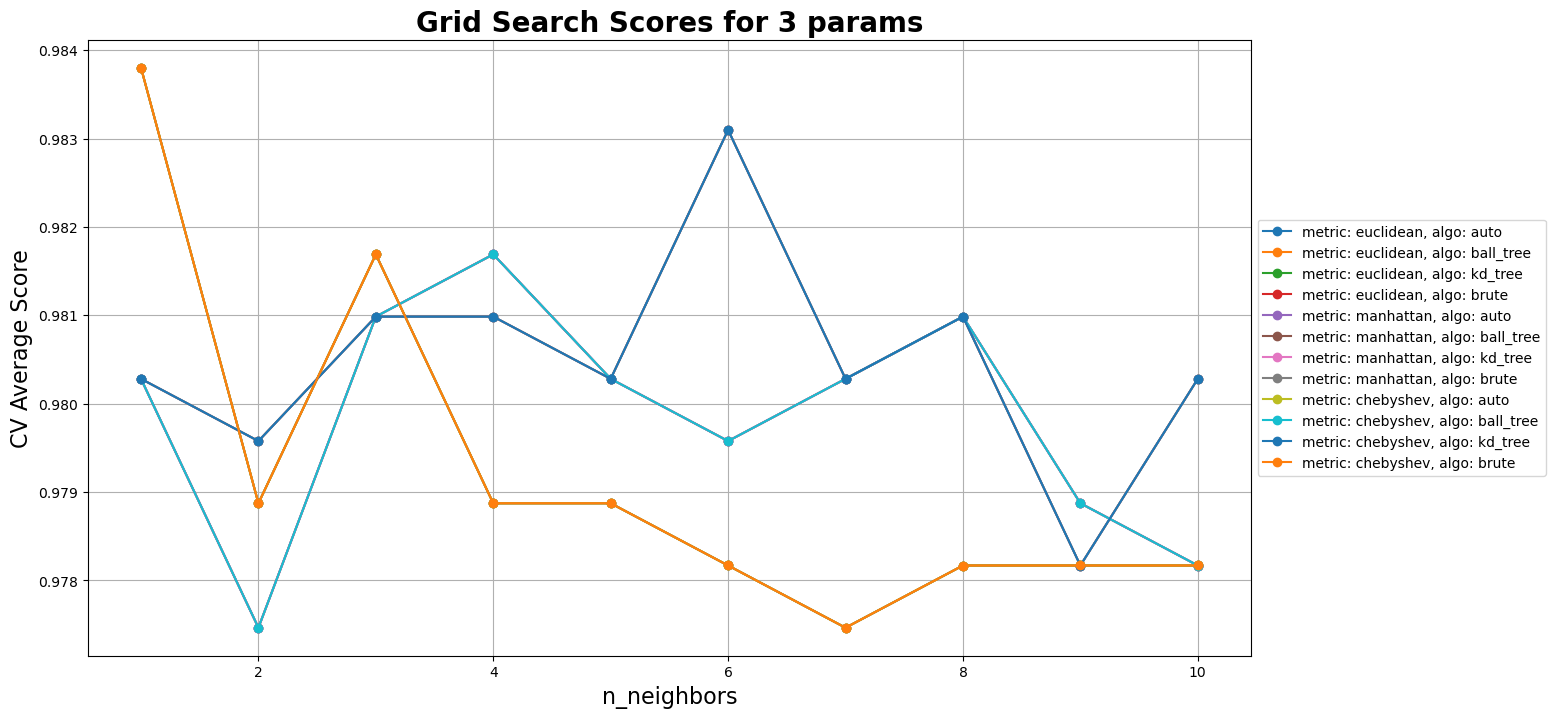

In [95]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train_pca, MY_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()

# knn_MY = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])
# # knn_MY = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
# knn_MY.fit(MY_X_train_pca, MY_y_train)

# y_pred = knn_MY.predict(MY_X_vali_pca)
y_pred = grid_search.predict(MY_X_vali_pca)


accuracy = accuracy_score(MY_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
print("Accuracy on testing:", accuracy)

end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['algorithm'], param_grid['metric'], 'n_neighbors', 'algo', 'metric')

In [53]:
# # Pair 2
# k_range = range(1, 11)
# metrics = ['euclidean', 'manhattan', 'chebyshev']
# algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for algo in algos:
#     algo_scores = {}
#     for metric in metrics:
#         metric_scores = []
#         for k in k_range:
#             knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm=algo)
#             scores = cross_val_score(knn, MY_X_train_pca, MY_y_train, cv=5, scoring='accuracy')
#             metric_scores.append(scores.mean())
#         algo_scores[metric] = metric_scores
#     k_scores[algo] = algo_scores

# # Plot the results
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         plt.plot(k_range, scores, label=metric + ' (' + algo + ')')

# plt.title("KNN Pair 2 with demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algorithm and metric
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         best_score = max(scores)
#         best_k = scores.index(best_score) + 1
#         print(f"{algo}, {metric}: Best k = {best_k}, Best score = {best_score}")

# KNN_2 - Pair 3

Best k: 6
Best k accuracy: 0.9835663082437277
Accuracy on testing:  0.5897435897435898
confusion matrix:
[[54 33]
 [31 38]]
testing time:  0.006990909576416016


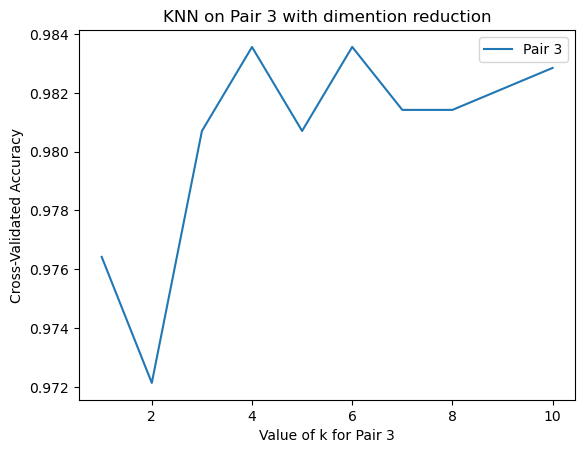

In [54]:
# Pair 3
k_range = range(1, 11)

k_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, AB_X_train_pca, AB_y_train, cv=5, scoring='accuracy')
    k_scores[k] = scores.mean()
    


best_k = max(k_scores, key= k_scores.get)
print(f"Best k: {best_k}")
print(f'Best k accuracy: {k_scores[best_k]}')

start_time = time.time()
knn_AB = KNeighborsClassifier(n_neighbors= best_k)
knn_AB.fit(AB_X_train_pca, AB_y_train)

y_pred = knn_AB.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('Accuracy on testing: ', accuracy)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

# Plot the results
plt.plot(list(k_scores.keys()), list(k_scores.values()), label='Pair 3')
plt.title('KNN on Pair 3 with dimention reduction')
plt.xlabel('Value of k for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


# KNN_2 - Pair 3: Bonus 2 - Tune more hyperparams
KNN: k, distance metrics, algos

Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 6}
Best cross-validated score:  0.9835663082437277
confusion matrix:
[[54 33]
 [31 38]]
Accuracy on testing: 0.5897435897435898
testing time:  5.55899977684021


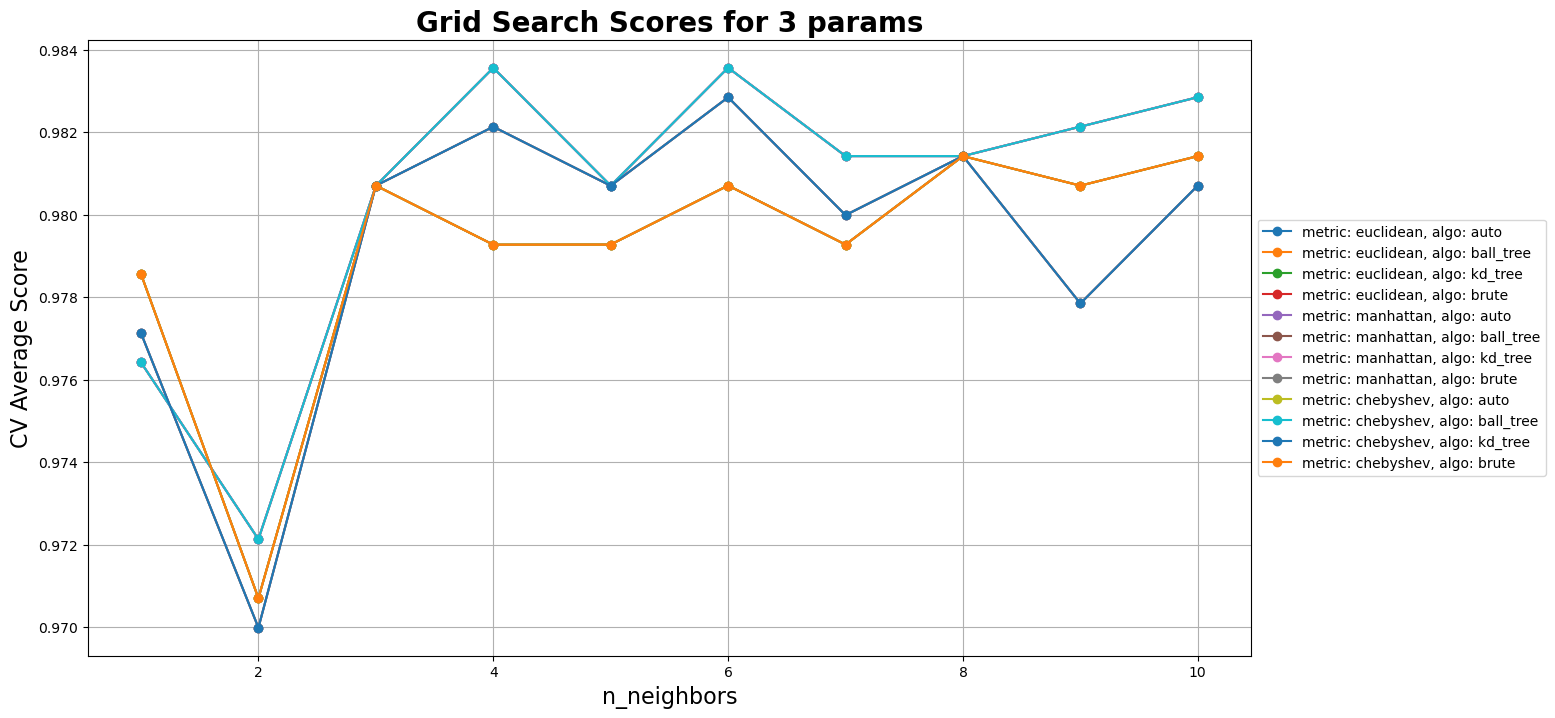

In [96]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a kNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train_pca, AB_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

strat_time = time.time()
# knn_AB = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], algorithm = grid_search.best_params_['algorithm'], metric = grid_search.best_params_['metric'])
# # knn_AB = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
# knn_AB.fit(AB_X_train_pca, AB_y_train)

# y_pred = knn_AB.predict(AB_X_vali_pca)

y_pred = grid_search.predict(AB_X_vali_pca)
accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))


print("Accuracy on testing:", accuracy)

end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)

results = grid_search.cv_results_
# print("mean score",results['mean_test_score'])
plot_grid_search_para3(results, param_grid['n_neighbors'], param_grid['algorithm'], param_grid['metric'], 'n_neighbors', 'algo', 'metric')

In [56]:
# # pair 3
# k_range = range(1, 11)
# metrics = ['euclidean', 'manhattan', 'chebyshev']
# algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
# k_scores = {}

# # use iteration to calculate different k, metric, and algorithm in models, then return the average accuracy based on the cross validation
# for algo in algos:
#     algo_scores = {}
#     for metric in metrics:
#         metric_scores = []
#         for k in k_range:
#             knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm=algo)
#             scores = cross_val_score(knn, AB_X_train_pca, AB_y_train, cv=5, scoring='accuracy')
#             metric_scores.append(scores.mean())
#         algo_scores[metric] = metric_scores
#     k_scores[algo] = algo_scores

# # Plot the results
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         plt.plot(k_range, scores, label=metric + ' (' + algo + ')')

# plt.title("KNN Pair 3 with demention reduction")
# plt.xlabel('Value of K')
# plt.ylabel('Cross-Validated Accuracy')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# # Print the best hyperparameters and cross-validated score for each algorithm and metric
# for algo, algo_scores in k_scores.items():
#     for metric, scores in algo_scores.items():
#         best_score = max(scores)
#         best_k = scores.index(best_score) + 1
#         print(f"{algo}, {metric}: Best k = {best_k}, Best score = {best_score}")

# Second Model. Random forest_2 (with dimension reduction)

# Random forest_2 - Pair 1

Best split: 4
Best split accuracy:0.8852830188679246
Accuracy on testing 0.49324324324324326
confusion matrix:
[[38 37]
 [38 35]]
testing time:  0.17003226280212402


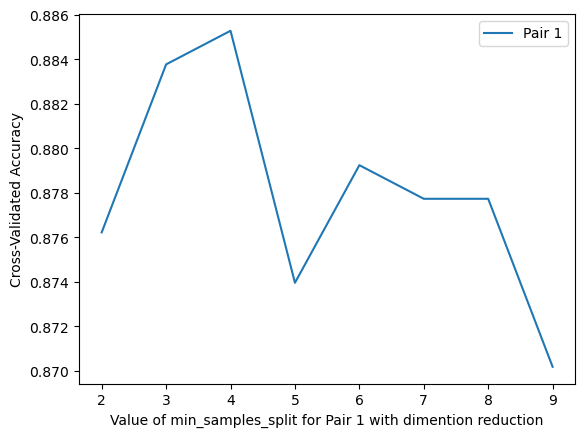

In [57]:
# Pair 1
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, HK_X_train_pca, HK_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(HK_X_train_pca, HK_y_train)

y_pred = rf.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('Accuracy on testing', accuracy)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
    
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 1')

plt.xlabel('Value of min_samples_split for Pair 1 with dimention reduction')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


In [58]:
# # Pair 1
# # Define hyperparameter grid
# param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4],
# #     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(HK_X_train_pca, HK_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# # rf_HK = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
# #                                max_features= grid_search.best_params_['max_features'],
# #                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
# #                                min_samples_split= grid_search.best_params_['min_samples_split'],
# #                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_HK = RandomForestClassifier(min_samples_split= grid_search.best_params_['min_samples_split'])
                            
# rf_HK.fit(HK_X_train_pca, HK_y_train)

# y_pred = rf_HK.predict(HK_X_vali_pca)

# accuracy = accuracy_score(HK_y_vali, y_pred)


# print("Accuracy:", accuracy)

# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = HK_X_train_pca.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Random forest_2 - Pair 2

Best split: 2
Best split accuracy:0.9838028169014084
confusion matrix:
[[47 48]
 [35 28]]
Accuracy on testing 0.47468354430379744
testing time:  0.15364480018615723


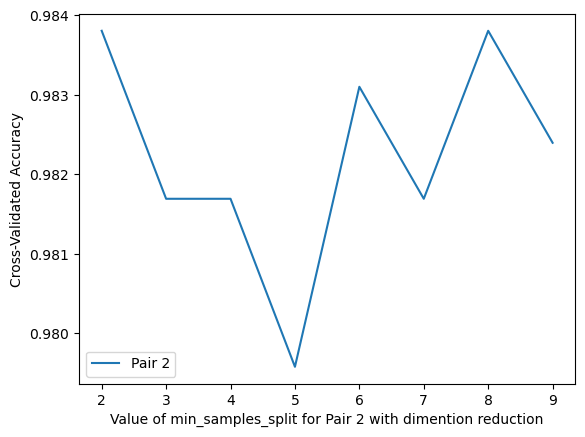

In [59]:
# Pair 2
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, MY_X_train_pca, MY_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(MY_X_train_pca, MY_y_train)

y_pred = rf.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
print('Accuracy on testing', accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
    
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 2')

plt.xlabel('Value of min_samples_split for Pair 2 with dimention reduction')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


In [60]:
# # Pair 2
# # Define hyperparameter grid
# param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# #     'min_samples_leaf': [1, 2, 4],
# #     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(HK_X_train_pca, HK_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# # rf_HK = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
# #                                max_features= grid_search.best_params_['max_features'],
# #                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
# #                                min_samples_split= grid_search.best_params_['min_samples_split'],
# #                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_MY = RandomForestClassifier(min_samples_split= grid_search.best_params_['min_samples_split'])
                            
# rf_MY.fit(MY_X_train_pca, MY_y_train)

# y_pred = rf_MY.predict(MY_X_vali_pca)

# accuracy = accuracy_score(MY_y_vali, y_pred)


# print("Accuracy:", accuracy)

# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = MY_X_train_pca.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Random forest_2 - Pair 3

Best split: 5
Best split accuracy:0.9792805939580133
confusion matrix:
[[54 33]
 [30 39]]
Accuracy on testing 0.5961538461538461
testing time:  0.15039873123168945


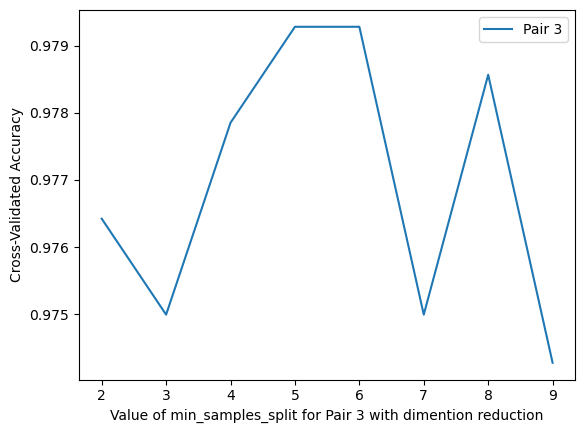

In [61]:
# Pair 3
min_samples_split = range(2, 10)

split_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in min_samples_split:
    rf = RandomForestClassifier(min_samples_split = k)
    scores = cross_val_score(rf, AB_X_train_pca, AB_y_train, cv=5, scoring='accuracy')
    split_scores[k] = scores.mean()

    
best_split = max(split_scores, key= split_scores.get)
print(f"Best split: {best_split}")
print(f'Best split accuracy:{split_scores[best_split]}')

start_time = time.time()
rf = RandomForestClassifier(min_samples_split = best_split)
rf.fit(AB_X_train_pca, AB_y_train)

y_pred = rf.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
print('Accuracy on testing', accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time: ',train_time)
    
# Plot the results
plt.plot(list(split_scores.keys()), list(split_scores.values()), label='Pair 3')

plt.xlabel('Value of min_samples_split for Pair 3 with dimention reduction')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

    


In [62]:
# # Pair 3
# # Define hyperparameter grid
# param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# #     'min_samples_leaf': [1, 2, 4],
# #     'max_features': ['sqrt', 'log2']
# }

# # Create estimator and GridSearchCV object
# rf = RandomForestClassifier()

# # Create GridSearchCV object to search over hyperparameters
# grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(HK_X_train_pca, HK_y_train)

# # Print best hyperparameters and corresponding score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# # rf_HK = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'] , 
# #                                max_features= grid_search.best_params_['max_features'],
# #                                min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
# #                                min_samples_split= grid_search.best_params_['min_samples_split'],
# #                                n_estimators= grid_search.best_params_['n_estimators'])
# rf_AB = RandomForestClassifier(min_samples_split= grid_search.best_params_['min_samples_split'])
                            
# rf_AB.fit(AB_X_train_pca, AB_y_train)

# y_pred = rf_MY.predict(AB_X_vali_pca)

# accuracy = accuracy_score(AB_y_vali, y_pred)


# print("Accuracy:", accuracy)

# # Export the first three decision trees from the forest
# for i in range(2):
#     tree = grid_search.best_estimator_.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names = AB_X_train_pca.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)


# Additional Model 1. ANN_2 (With dimention reduction)


# ANN_2 - Pair 1

Best acti: tanh
Best acti accuracy:0.8996226415094342
confusion matrix:
[[37 38]
 [38 35]]
Accuracy on testing: 0.4864864864864865
testing time 1.5612521171569824


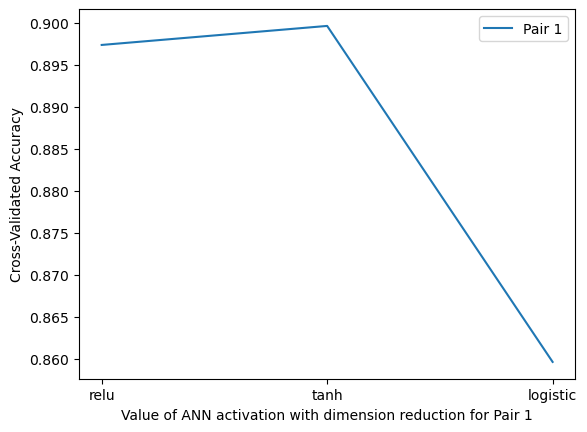

In [63]:
#  Pair 1


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, HK_X_train_pca, HK_y_train, cv=5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_HK = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_HK.fit(HK_X_train_pca, HK_y_train)

y_pred = mlp_HK.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)



# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 1')

plt.xlabel('Value of ANN activation with dimension reduction for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

# ANN_2 - Pair 1: Bonus 2 - Tune more hyperparams
ANN: activation funct, solver, max iterations

Best parameters:  {'activation': 'relu', 'max_iter': 1500, 'solver': 'adam'}
Best cross-validated score:  0.9064150943396226
training time 1.5612521171569824
confusion matrix:
[[30 45]
 [32 41]]
Accuracy on testing: 0.4797297297297297
testing time 0.00200653076171875


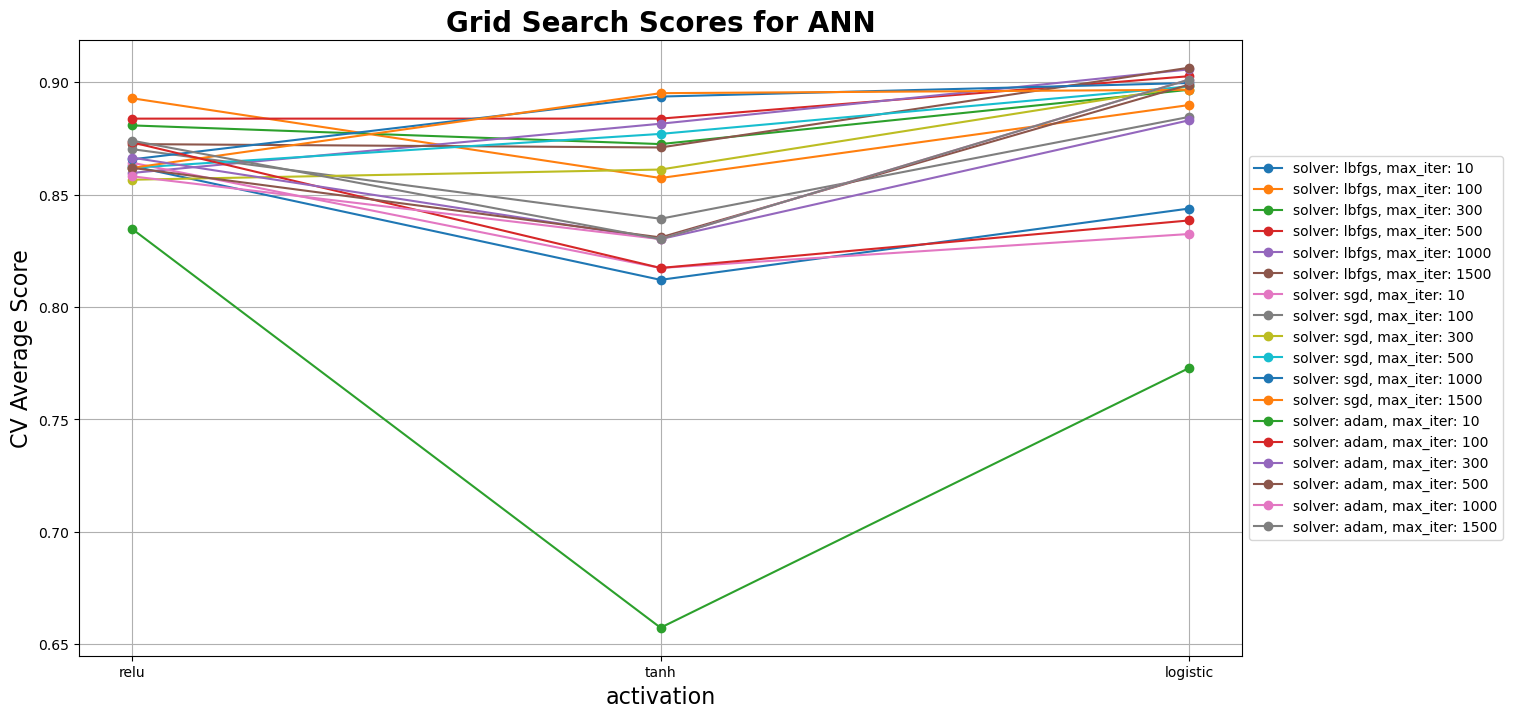

In [64]:
#  Pair 1

# Define hyperparameter grid to search over
#   'learning_rate_init': [0.001, 0.01, 0.1], 'alpha': [0.0001, 0.001, 0.01],set to default cuz it is taking forever to converge
param_grid = {

    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 1500]
     }

# Create an MLP classifier object
mlp_HK = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_HK, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train_pca, HK_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)
print("training time", train_time)


start_time = time.time()
# mlp_HK = MLPClassifier(activation = grid_search.best_params_['activation'], 
# #                        hidden_layer_sizes= grid_search.best_params_['hidden_layer_sizes'],
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])
# # mlp_HK = MLPClassifier(max_iter= grid_search.best_params_['maz_iter'])
# mlp_HK.fit(HK_X_train_pca, HK_y_train)

y_pred = grid_search.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))
print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)

results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')

# ANN_2 - Pair 2

Best acti: tanh
Best acti accuracy:0.9830985915492958
confusion matrix:
[[41 54]
 [37 26]]
Accuracy on testing: 0.4240506329113924
testing time 0.783151388168335


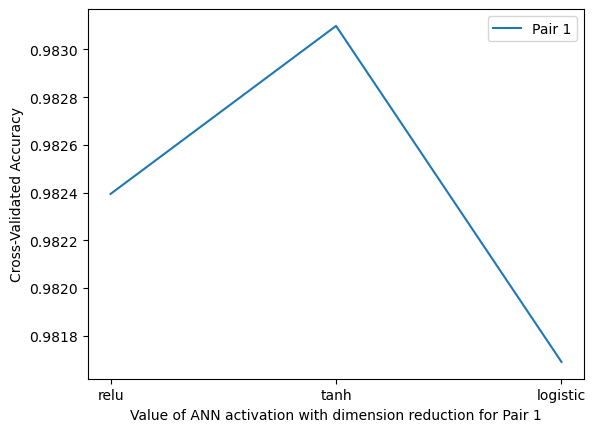

In [65]:
#  Pair 2


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, MY_X_train_pca, MY_y_train, cv=5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_MY = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_MY.fit(MY_X_train_pca, MY_y_train)

y_pred = mlp_MY.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))
print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)



# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 1')

plt.xlabel('Value of ANN activation with dimension reduction for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

# ANN_2 - Pair 2: Bonus 2 - Tune more hyperparams
ANN: activation funct, solver, max iterations

Best parameters:  {'activation': 'tanh', 'max_iter': 1500, 'solver': 'sgd'}
Best cross-validated score:  0.9859154929577466
training time 18.137839794158936
confusion matrix:
[[37 58]
 [37 26]]
Accuracy on testing: 0.3987341772151899


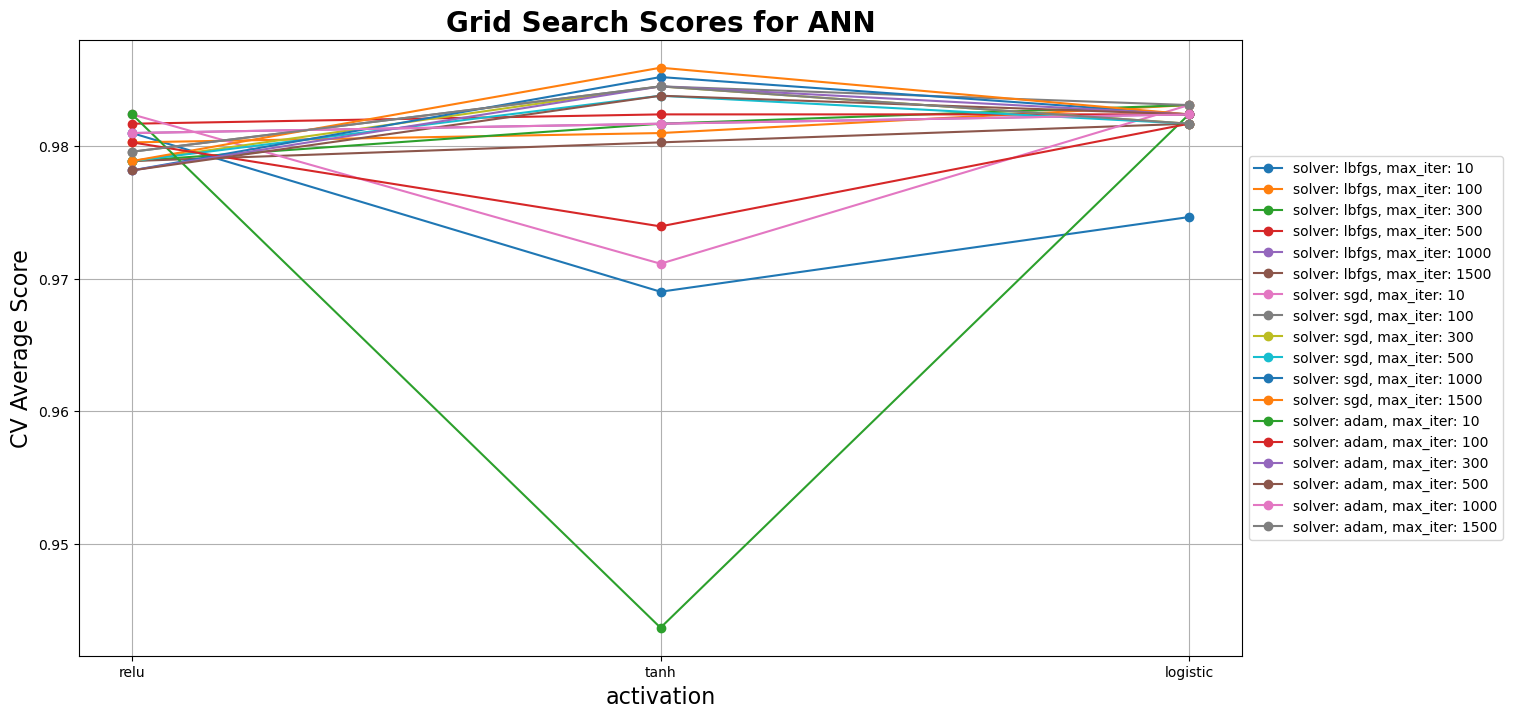

In [66]:
#  Pair 2

# Define hyperparameter grid to search over
#   'learning_rate_init': [0.001, 0.01, 0.1], 'alpha': [0.0001, 0.001, 0.01],set to default cuz it is taking forever to converge
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 1500]
     }

start_time = time.time()
# Create an MLP classifier object
mlp_MY = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_MY, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train_pca, MY_y_train)

end_time = time.time()
train_time = end_time - start_time
# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)
print("training time", train_time)

# mlp_MY = MLPClassifier(activation = grid_search.best_params_['activation'], 
# #                        hidden_layer_sizes= grid_search.best_params_['hidden_layer_sizes'],
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])
# mlp_AB = MLPClassifier(max_iter= grid_search.best_params_['max_iter'])
# mlp_MY.fit(MY_X_train_pca, MY_y_train)

y_pred = grid_search.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))

print("Accuracy on testing:", accuracy)
results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')

# ANN_2 - Pair 3

Best acti: tanh
Best acti accuracy:0.9821326164874552
confusion matrix:
[[55 32]
 [40 29]]
Accuracy on testing: 0.5384615384615384
testing time 0.94681715965271


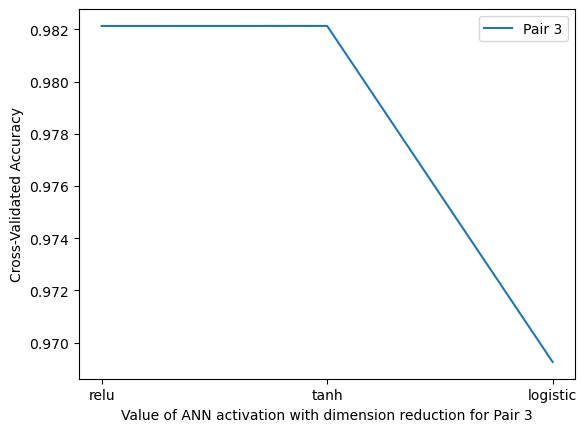

In [67]:
#  Pair 3


acti = ['relu', 'tanh', 'logistic']

acc_scores = {}

for k in acti:
    mlp = MLPClassifier(activation = k)
    scores = cross_val_score(mlp, AB_X_train_pca, AB_y_train, cv=5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_act = max(acc_scores, key= acc_scores.get)
print(f"Best acti: {best_act}")
print(f'Best acti accuracy:{acc_scores[best_act]}')


start_time = time.time()
mlp_Ab = MLPClassifier(hidden_layer_sizes= (128, ),
                       activation = best_act)
mlp_AB.fit(AB_X_train_pca, AB_y_train)

y_pred = mlp_AB.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))

print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print("testing time", train_time)



# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 3')

plt.xlabel('Value of ANN activation with dimension reduction for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

# ANN_2 - Pair 3: Bonus 2 - Tune more hyperparams
ANN: activation funct, solver, max iterations

Best parameters:  {'activation': 'tanh', 'max_iter': 500, 'solver': 'adam'}
Best cross-validated score:  0.9842754736303124
training time 31.477876901626587
confusion matrix:
[[55 32]
 [36 33]]
Accuracy on testing: 0.5641025641025641


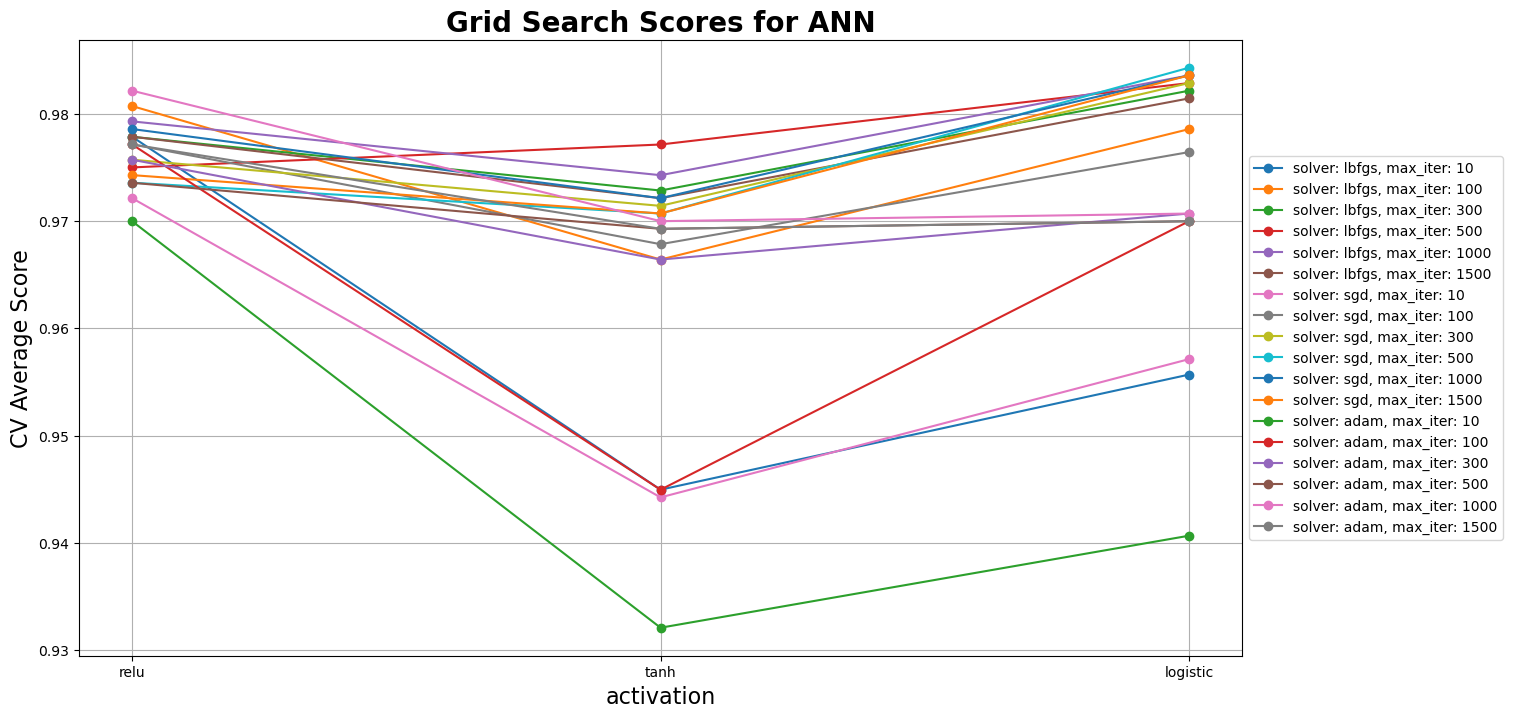

In [68]:
#  Pair 3

# Define hyperparameter grid to search over
#   'learning_rate_init': [0.001, 0.01, 0.1], 'alpha': [0.0001, 0.001, 0.01],set to default cuz it is taking forever to converge
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10, 100, 300, 500, 1000, 1500]
     }

start_time = time.time()
# Create an MLP classifier object
mlp_AB = MLPClassifier()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(mlp_AB, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train_pca, AB_y_train)

end_time = time.time()
train_time = end_time - start_time
# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)
print("training time", train_time)

# mlp_AB = MLPClassifier(activation = grid_search.best_params_['activation'], 
# #                        hidden_layer_sizes= grid_search.best_params_['hidden_layer_sizes'],
#                        max_iter= grid_search.best_params_['max_iter'],
#                        solver= grid_search.best_params_['solver'])
# mlp_AB = MLPClassifier(max_iter= grid_search.best_params_['maz_iter'])
# mlp_AB.fit(AB_X_train_pca, AB_y_train)

y_pred = grid_search.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
results = grid_search.cv_results_
plot_grid_search_para3(results, param_grid['activation'], param_grid['max_iter'], param_grid['solver'], 'activation', 'max_iter','solver')

# Additional Model 2. SVM_2 (with dimention reduction)


# SVM_2 - Pair 1

Best kernel: rbf
Best kernel accuracy:0.9086792452830188
confusion matrix:
[[33 42]
 [36 37]]
Accuracy on testing: 0.47297297297297297
testing time 0.03701496124267578


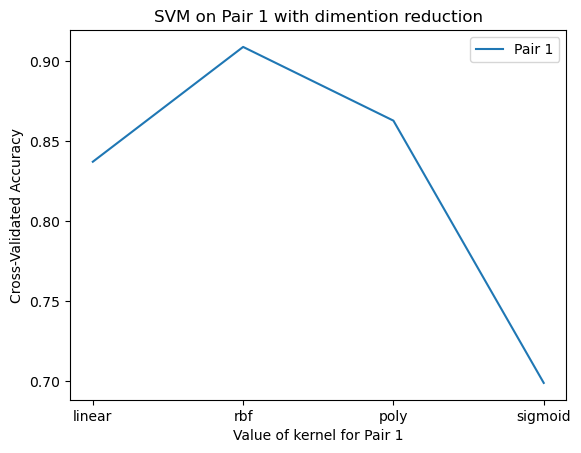

In [69]:
# Plot Pair 1
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, HK_X_train_pca, HK_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_HK = SVC(kernel = best_kernel)
svm_HK.fit(HK_X_train_pca, HK_y_train)

y_pred = svm_HK.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 1')
plt.title('SVM on Pair 1 with dimention reduction')
plt.xlabel('Value of kernel for Pair 1')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()




# SVM_2 - Pair 1: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 100, 'kernel': 'rbf'}
Best cross-validated score:  0.9101886792452831
confusion matrix:
[[29 46]
 [40 33]]
Accuracy on testing: 0.4189189189189189
testing time 0.006007671356201172


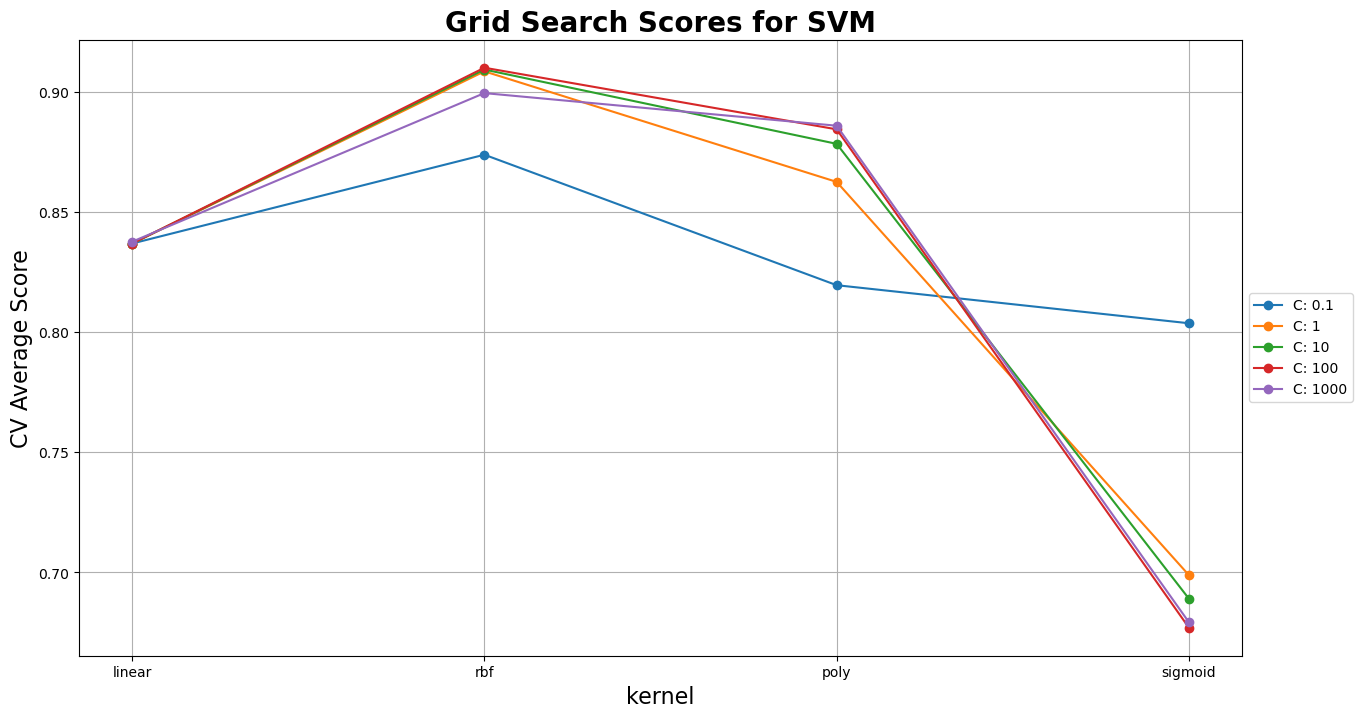

In [70]:
# Pair 1

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(HK_X_train_pca, HK_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_HK = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_HK.fit(HK_X_train_pca, HK_y_train)

y_pred = grid_search.predict(HK_X_vali_pca)

accuracy = accuracy_score(HK_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(HK_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time)
results = grid_search.cv_results_
plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )

# SVM_2 Pair 2

Best kernel: linear
Best kernel accuracy:0.9830985915492958
confusion matrix:
[[42 53]
 [36 27]]
Accuracy on testing: 0.43670886075949367
testing time 0.011017322540283203


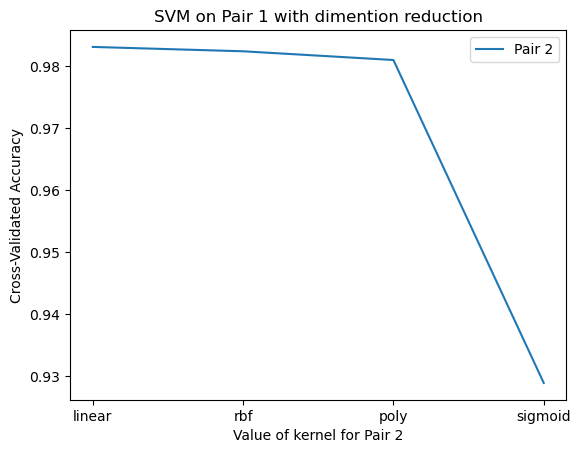

In [89]:
# Plot Pair 2
from sklearn.svm import SVC
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, MY_X_train_pca, MY_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_MY = SVC(kernel = best_kernel)
svm_MY.fit(MY_X_train_pca, MY_y_train)

y_pred = svm_MY.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))


print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 2')
plt.title('SVM on Pair 1 with dimention reduction')
plt.xlabel('Value of kernel for Pair 2')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()




# SVM_2 - Pair 2: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 100, 'kernel': 'rbf'}
Best cross-validated score:  0.9838028169014086
confusion matrix:
[[45 50]
 [35 28]]
Accuracy on testing: 0.4620253164556962
testing time 0.0020003318786621094


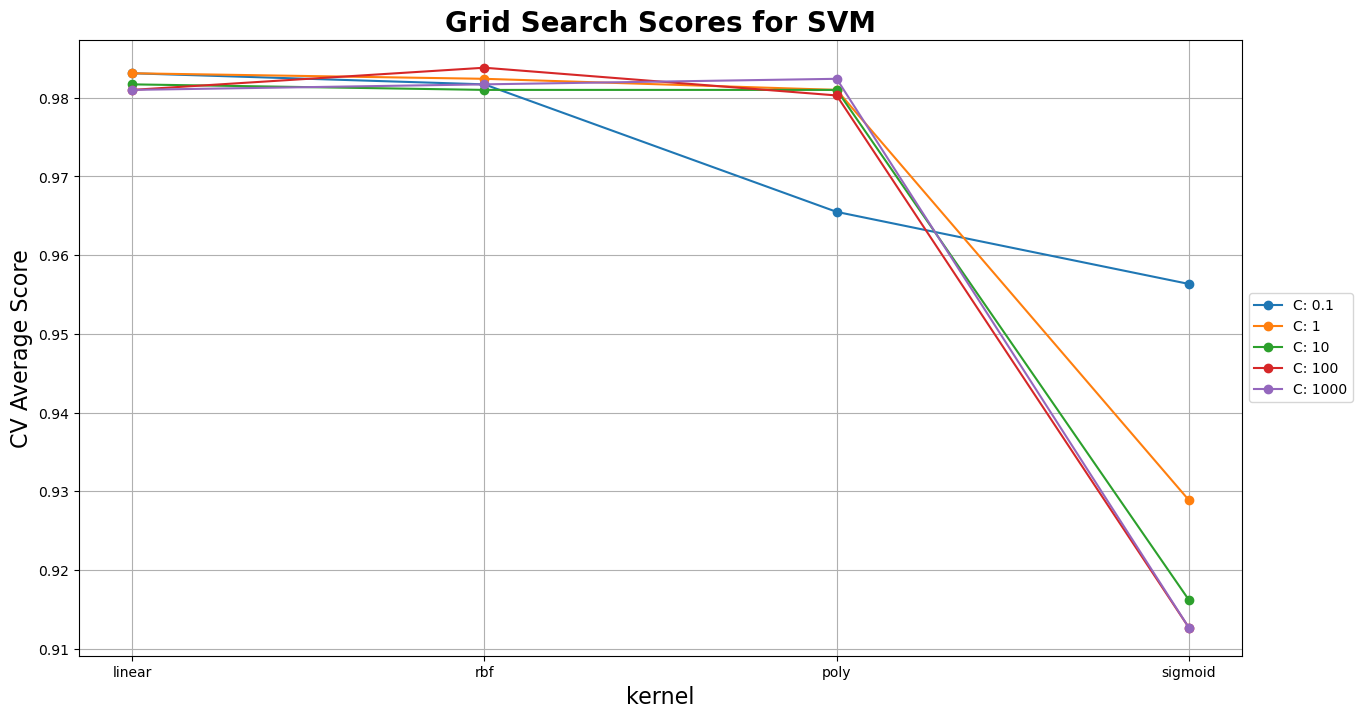

In [72]:
# Pair 2

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(MY_X_train_pca, MY_y_train)

# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_MY = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_MY.fit(MY_X_train_pca, MY_y_train)

y_pred = grid_search.predict(MY_X_vali_pca)

accuracy = accuracy_score(MY_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(MY_y_vali, y_pred))


end_time = time.time()
train_time = end_time - start_time

print("Accuracy on testing:", accuracy)
print('testing time', train_time)

results = grid_search.cv_results_
plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )

# SVM_2 Pair 3

Best kernel: rbf
Best kernel accuracy:0.9785560675883257
confusion matrix:
[[53 34]
 [33 36]]
Accuracy on testing: 0.5705128205128205
testing time 0.013021707534790039


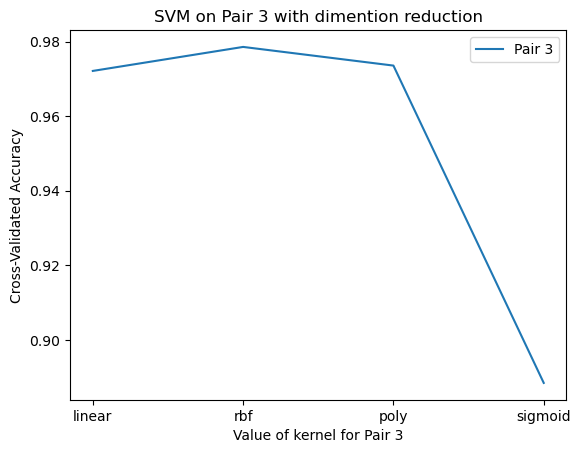

In [73]:
# Plot Pair 3
kernel=['linear', 'rbf', 'poly', 'sigmoid']

acc_scores = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kernel:
    svm = SVC(kernel = k)
    scores = cross_val_score(svm, AB_X_train_pca, AB_y_train, cv = 5, scoring='accuracy')
    acc_scores[k] = scores.mean()

best_kernel = max(acc_scores, key= acc_scores.get)
print(f"Best kernel: {best_kernel}")
print(f'Best kernel accuracy:{acc_scores[best_kernel]}')    
  
start_time = time.time()
svm_AB = SVC(kernel = best_kernel)
svm_AB.fit(AB_X_train_pca, AB_y_train)

y_pred = svm_AB.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)

print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))
print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time) 
    
    
    
# Plot the results
plt.plot(list(acc_scores.keys()), list(acc_scores.values()), label='Pair 3')
plt.title('SVM on Pair 3 with dimention reduction')
plt.xlabel('Value of kernel for Pair 3')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()



# SVM_2 - Pair 3: Bonus 2 - Tune more hyperparams
SVM: kernel, C

Best parameters:  {'C': 100, 'kernel': 'rbf'}
Best cross-validated score:  0.9849948796722992
confusion matrix:
[[42 45]
 [33 36]]
Accuracy on testing: 0.5
testing time 0.002000570297241211


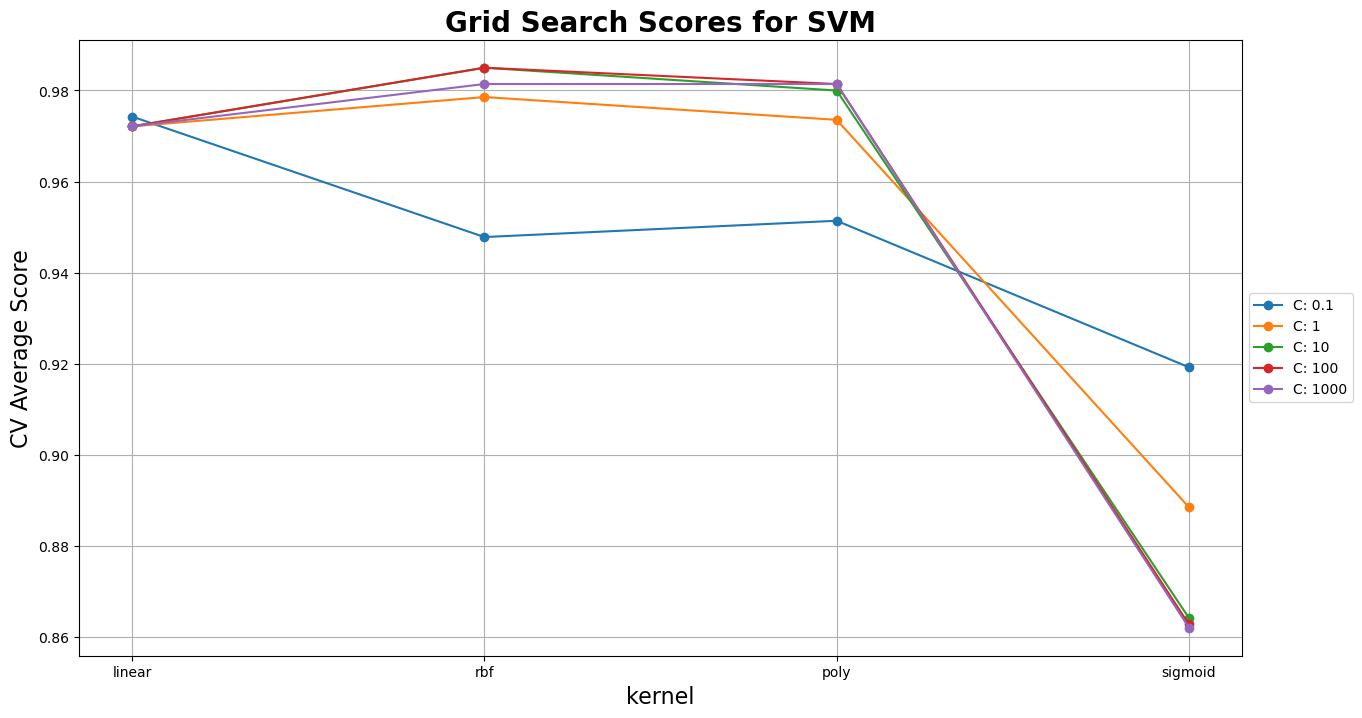

In [74]:
# Pair 3

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(AB_X_train_pca, AB_y_train)


# Print the best hyperparameters and cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

start_time = time.time()
# svm_AB = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
# svm_AB.fit(AB_X_train_pca, AB_y_train)

y_pred = grid_search.predict(AB_X_vali_pca)

accuracy = accuracy_score(AB_y_vali, y_pred)
print('confusion matrix:')
print(confusion_matrix(AB_y_vali, y_pred))

print("Accuracy on testing:", accuracy)
end_time = time.time()
train_time = end_time - start_time
print('testing time', train_time)

results = grid_search.cv_results_
plot_grid_search_para2(results, param_grid['kernel'], param_grid['C'], 'kernel', "C" )